# Housing Company Assignment
## Assignment Part - I
    -- Submitted by Suprabhat Paul

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

***The company wants to know:***

- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house

***Goal:***
- Develop a model to find the variables which are significant in predicting the price of a house.
- Determine the optimal value of lambda for ridge and lasso regression.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## Step 1: Importing Libraries

In [61]:
from IPython.core.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
f'NumPy version: {np.__version__} | Pandas version: {pd.__version__} | Seaborn version: {sns.__version__}'

'NumPy version: 1.20.1 | Pandas version: 1.2.4 | Seaborn version: 0.11.1'

## Step 2: Reading Dataset and Understanding Data

In [62]:
# Importing the data for analysis
housingDF = pd.read_csv('train.csv')
pd.options.display.max_colwidth = 255
pd.options.display.max_rows=225
housingDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
# inspect housingDataFrame dataframe

display(HTML('<h4>Shape</h4>'))
print(housingDF.shape)
display(HTML('<hr></hr>'))

display(HTML('<h4>Columns</h4>'))
print(housingDF.columns)
display(HTML('<hr></hr>'))

display(HTML('<h4>Columns having null values</h4>'))
print(housingDF.isnull().any())
display(HTML('<hr></hr>'))

display(HTML('<h4>Count of rows in coulmn in dataframe</h4>'))
print(housingDF.count())
display(HTML('<hr></hr>'))

display(HTML('<h4>Info</h4>'))
print(housingDF.info())
display(HTML('<hr></hr>'))

display(HTML('<h4>Describe</h4>'))
housingDF.describe()

(1460, 81)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF   

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinSF1       1460
BsmtFinType2     1422
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
1stFlrSF         1460
2ndFlrSF         1460
LowQualFin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 3: Cleaning Data

### 3.1 Drop duplicate values in dataset, if exist

In [64]:
# Dropping duplicate values in dataset, if exist
housingDF = housingDF.drop_duplicates()
print(f'\nShape of dataframe:\n{housingDF.shape}')
housingDF.head()


Shape of dataframe:
(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3.2 Removing identifier field

In [65]:
housingDF.drop(['Id'], axis=1, inplace=True)

In [66]:
print(f'\nShape of dataframe:\n{housingDF.shape}')
housingDF.head()


Shape of dataframe:
(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3.3 Finding and removing columns where missing values are more than 15%

In [67]:
uniques = housingDF.apply(lambda x:x.nunique())
housingLoanDF = housingDF.drop(uniques[uniques < 2].index, axis = 1)
print(housingDF.shape)
print(((housingDF.isnull().sum()/housingDF.shape[0])*100).round(2))

(1460, 80)
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00


In [68]:
# Dropping Columns with more than 15 % missing values
housingDF.drop(['LotFrontage','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
print(((housingDF.isnull().sum()/housingDF.shape[0])*100).round(2))

MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBa

In [69]:
display(HTML('<h4>MasVnrType</h4>'))
print(housingDF['MasVnrType'].describe())    # 0.55% NaN
display(HTML('<hr></hr>'))

display(HTML('<h4>BsmtQual</h4>'))
print(housingDF['BsmtQual'].describe())        # 2.53% NaN
display(HTML('<hr></hr>'))

display(HTML('<h4>BsmtCond</h4>'))
print(housingDF['BsmtCond'].describe())        # 2.53% NaN
display(HTML('<hr></hr>'))

display(HTML('<h4>BsmtExposure</h4>'))
print(housingDF['BsmtExposure'].describe())    # 2.60% NaN
display(HTML('<hr></hr>'))

display(HTML('<h4>BsmtFinType1</h4>'))
print(housingDF['BsmtFinType1'].describe())    # 2.53% NaN
display(HTML('<hr></hr>'))

display(HTML('<h4>MasVnrArea</h4>'))
print(housingDF['MasVnrArea'].describe())      # 0.55% NaN
display(HTML('<hr></hr>'))

display(HTML('<h4>BsmtFinType2</h4>'))
print(housingDF['BsmtFinType2'].describe())    # 2.60% NaN
display(HTML('<hr></hr>'))

display(HTML('<h4>Electrical</h4>'))
print(housingDF['Electrical'].describe())      # 0.07% NaN
display(HTML('<hr></hr>'))

display(HTML('<h4>GarageType</h4>'))
print(housingDF['GarageType'].describe())      # 5.55% NaN
display(HTML('<hr></hr>'))

display(HTML('<h4>GarageYrBlt</h4>'))
print(housingDF['GarageYrBlt'].describe())     # 5.55% NaN
display(HTML('<hr></hr>'))

display(HTML('<h4>GarageFinish</h4>'))
print(housingDF['GarageFinish'].describe())    # 5.55% NaN
display(HTML('<hr></hr>'))

display(HTML('<h4>GarageQual</h4>'))
print(housingDF['GarageQual'].describe())      # 5.55% NaN
display(HTML('<hr></hr>'))

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object


count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object


count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object


count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object


count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object


count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object


count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object


count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object


count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object


count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object


### 3.4 Dropping rows for the NaN values

In [70]:
housingDF.dropna(axis='rows', inplace=True)
# Checking for percentage of missing values per column
print(housingDF.shape)
print(((housingDF.isnull().sum()/housingDF.shape[0])*100).round(2))

(1338, 74)
MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
Ha

### 3.5 Creating derived features

In [71]:
# Converting dates (YearBuilt, YearRemodAdd, GarageYrBlt) to days (DiffYearBuilt, DiffYearRemodAdd, DiffGarageYrBlt) from today
housingDF['DiffYearBuilt'] = pd.datetime.now().year - housingDF['YearBuilt']
housingDF['DiffYearRemodAdd'] = pd.datetime.now().year - housingDF['YearRemodAdd']
housingDF['DiffGarageYrBlt'] = pd.datetime.now().year - housingDF['GarageYrBlt']
print(housingDF.shape)

(1338, 77)


In [72]:
# Creating separate array for Numeric and categorical Values for Operation.
# Numerical Columns: 
numericalColumn = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
           'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'DiffYearBuilt', 'DiffYearRemodAdd',
           'DiffGarageYrBlt']
display(HTML('<h4>Number of Numerical Columns</h4>'))
print(len(numericalColumn))
display(HTML('<hr></hr>'))

# Categorical Columns: 
categoricalColumn = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                     'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
                     'ExterCond',  'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 
                     'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 
                     'SaleType', 'SaleCondition']
display(HTML('<h4>Number of Categorical Columns</h4>'))
print(len(categoricalColumn))
display(HTML('<hr></hr>'))



# Listing distinct variables for each Categorical columns to check issues if any
display(HTML('<h4>Distinct variables for each Categorical columns</h4>'))
for col in categoricalColumn:
    print(col,' : ',housingDF[col].unique())
    
display(HTML('<hr></hr>'))

# Target Column:
outComeColumn = 'SalePrice'

30


43


MSSubClass  :  [ 60  20  70  50 190  45 120  30  85  90  80 160  75 180  40]
MSZoning  :  ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street  :  ['Pave' 'Grvl']
LotShape  :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour  :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities  :  ['AllPub' 'NoSeWa']
LotConfig  :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope  :  ['Gtl' 'Mod' 'Sev']
Neighborhood  :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'Edwards' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1  :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2  :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType  :  ['1Fam' '2fmCon' 'TwnhsE' 'Duplex' 'Twnhs']
HouseStyle  :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallQual  :  [ 7  6  8  5  9  4 10  3  2]
OverallCond  :  [5 8 6 7 4 3 9 2]
R

## Step 4: Exploratory Data Analysis

### 4.1 Visualise the target variable

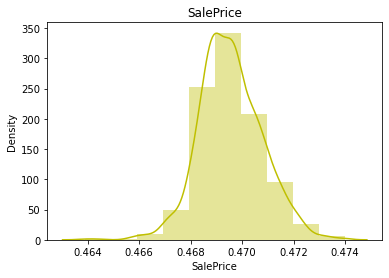

In [18]:
housingDF[outComeColumn] = np.log1p(housingDF[outComeColumn])

plt.title(outComeColumn)
sns.distplot(housingDF[outComeColumn], bins=10, color='y')
plt.show()

#### 4.2.1 Joinplot between SalePrice and numerical column

<Figure size 432x288 with 0 Axes>

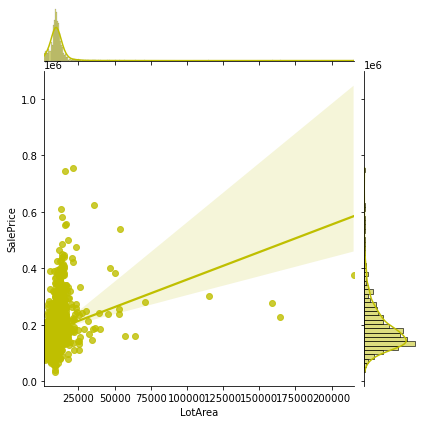

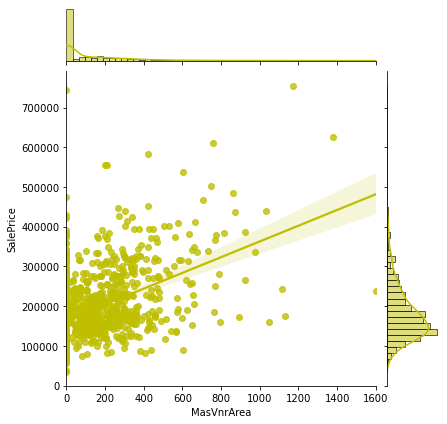

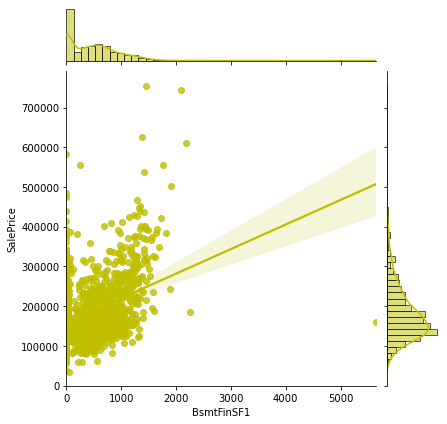

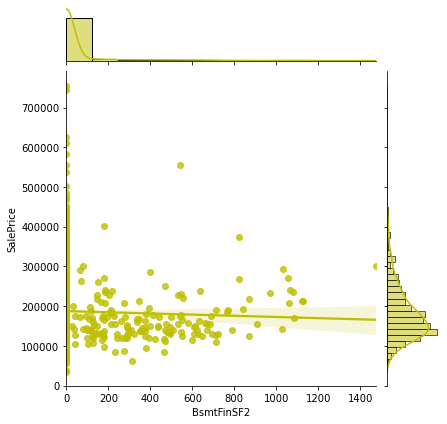

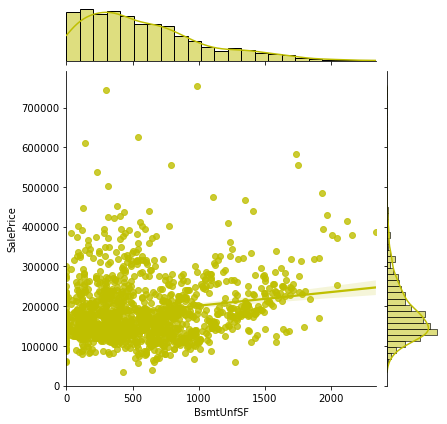

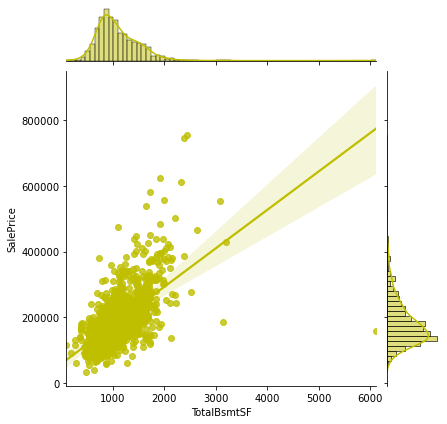

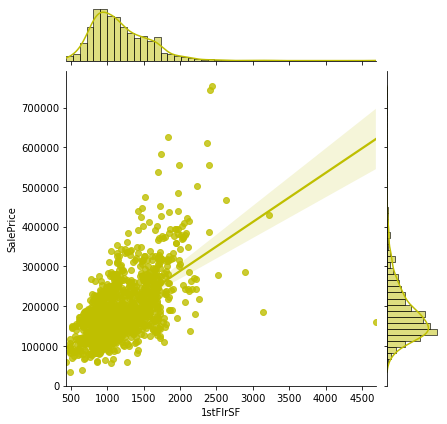

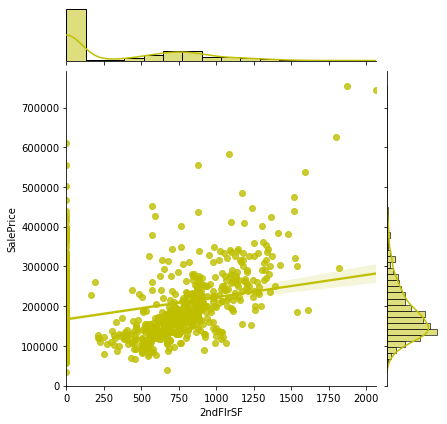

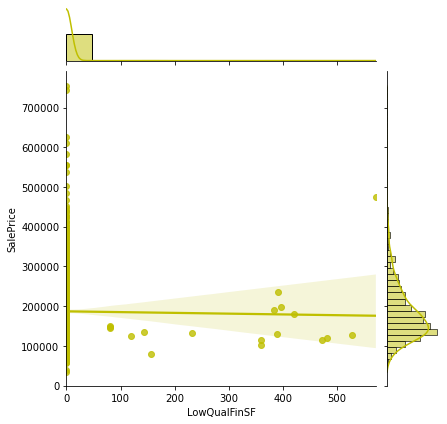

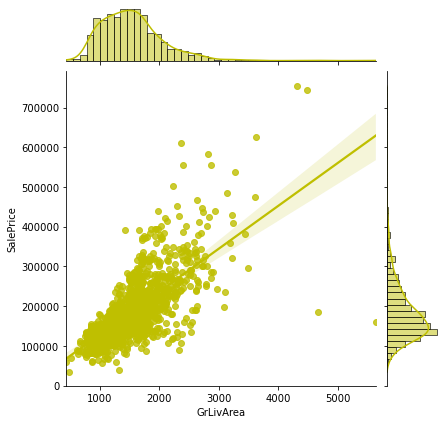

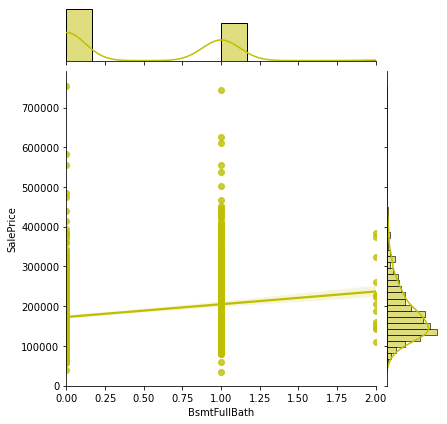

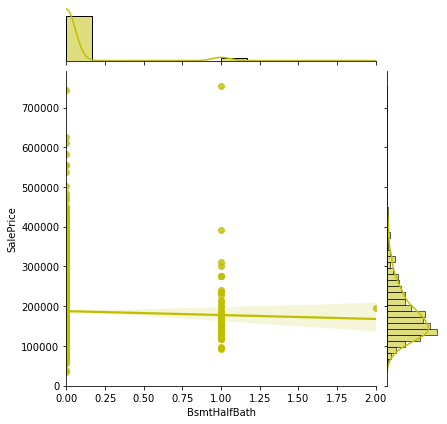

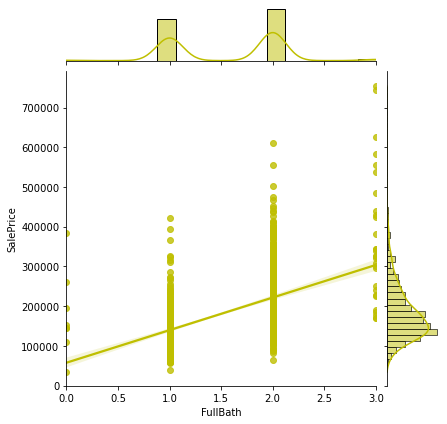

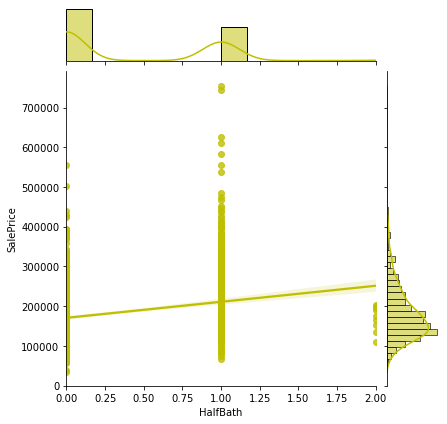

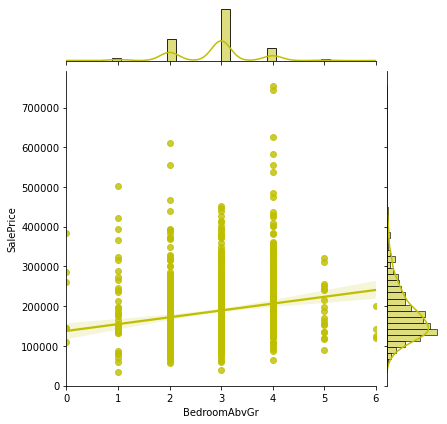

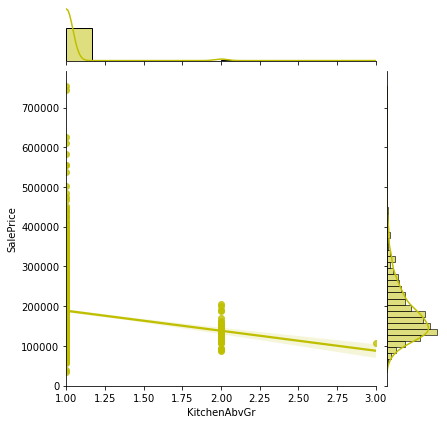

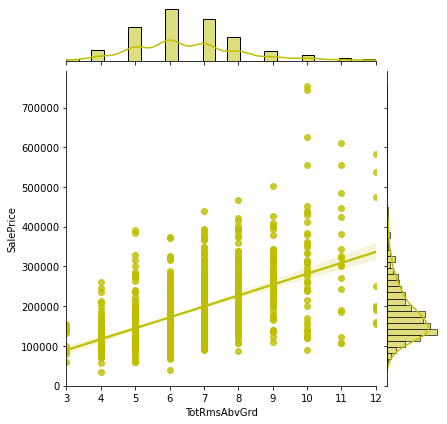

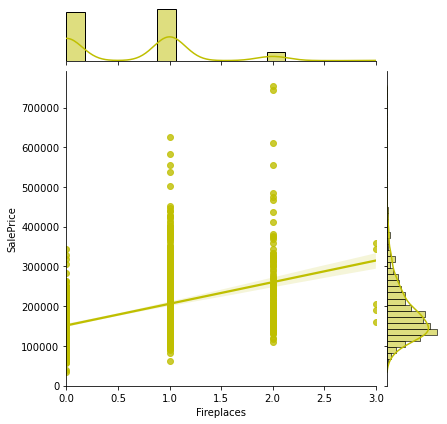

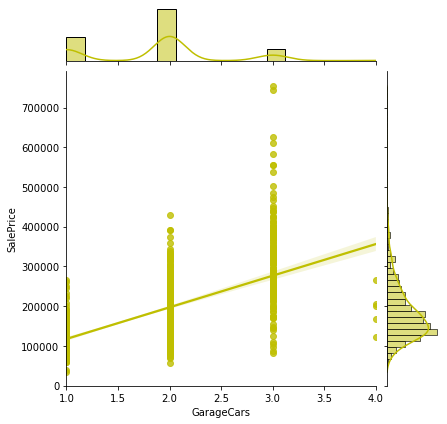

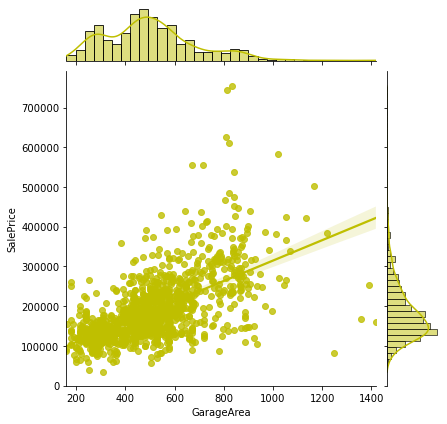

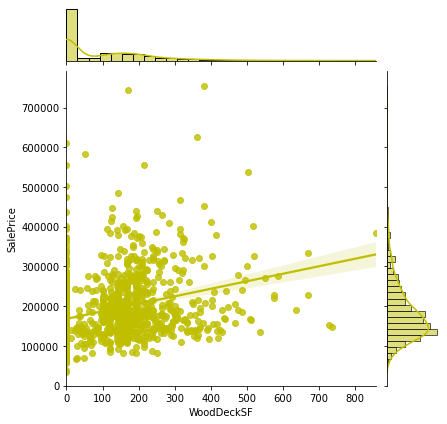

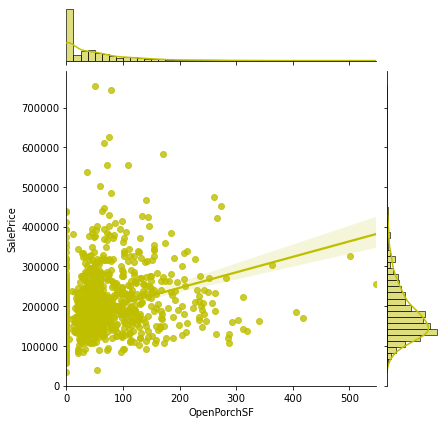

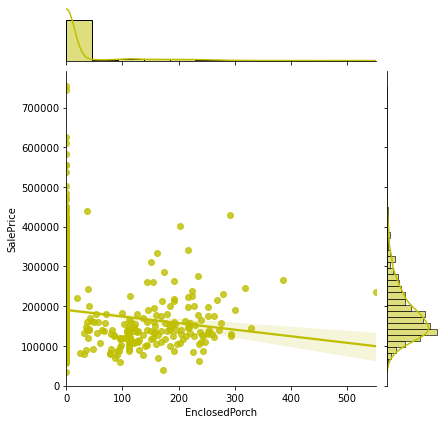

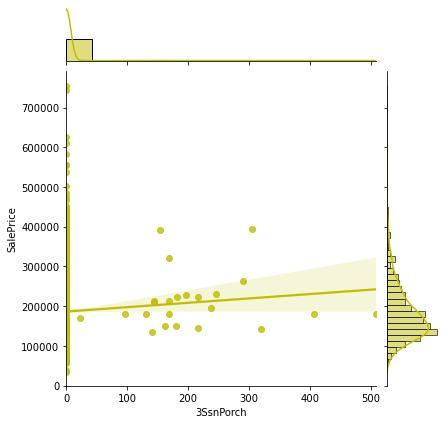

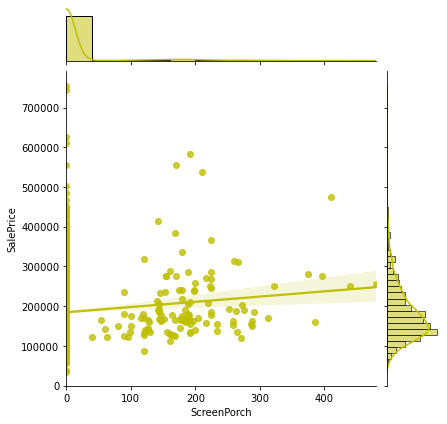

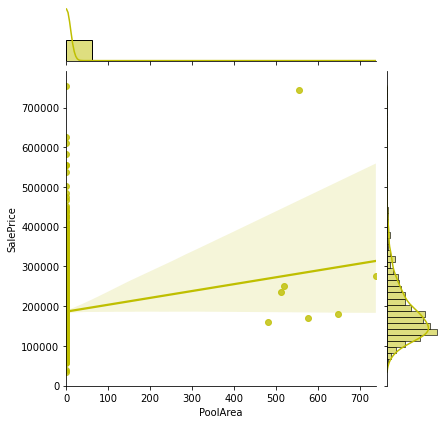

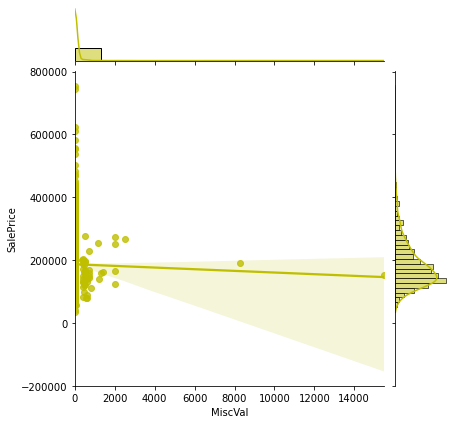

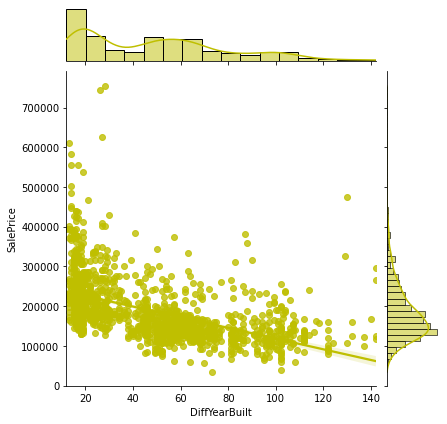

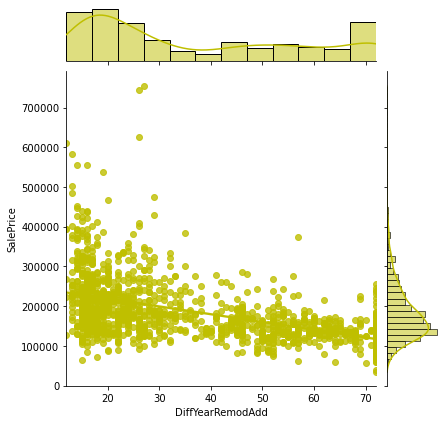

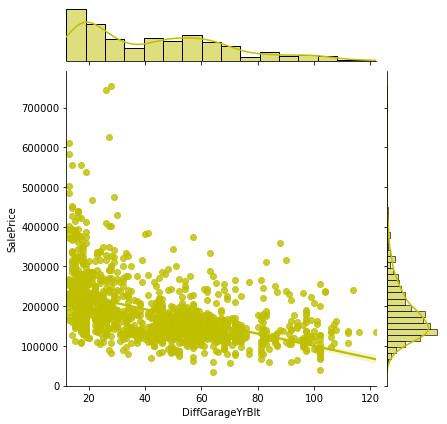

In [73]:
for index, column in enumerate(numericalColumn):
    plt.figure(index)
    sns.jointplot(x=column, y=outComeColumn, data=housingDF[[column,outComeColumn]], color='y', kind='reg')

#### 4.2.2 Check the numerical values using pairplots

<Figure size 720x360 with 0 Axes>

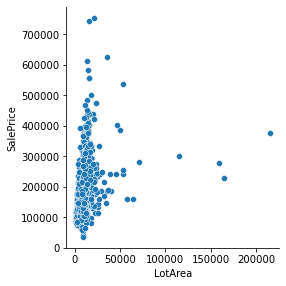

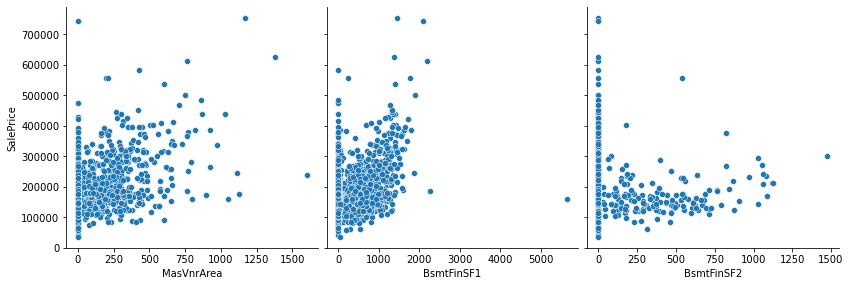

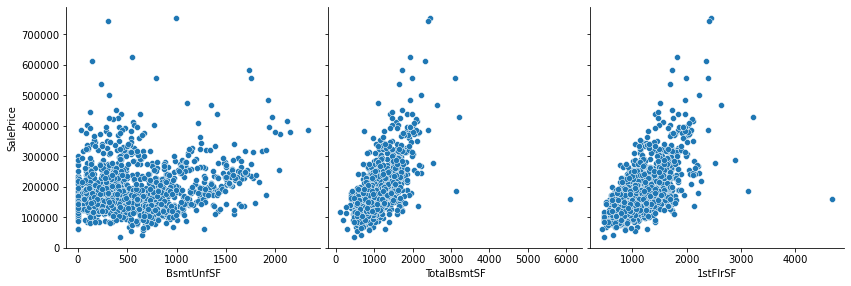

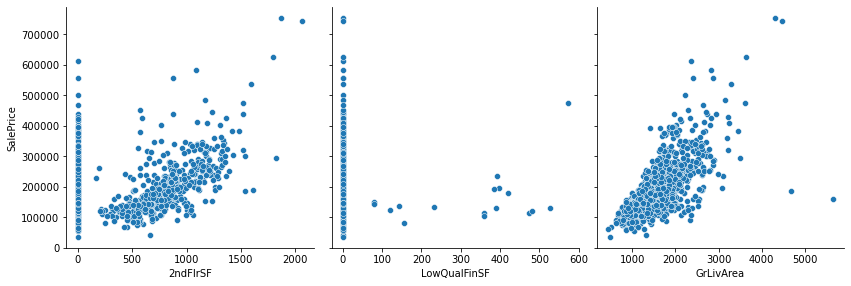

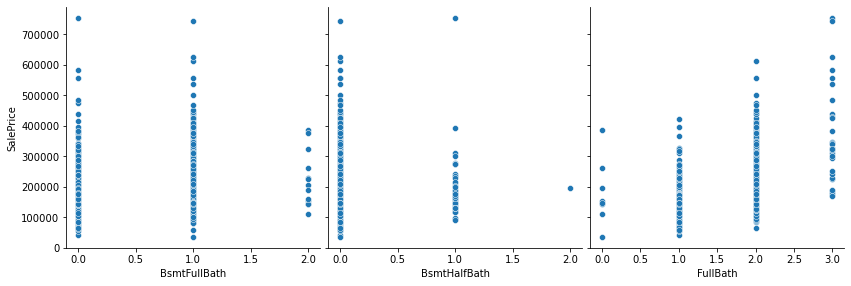

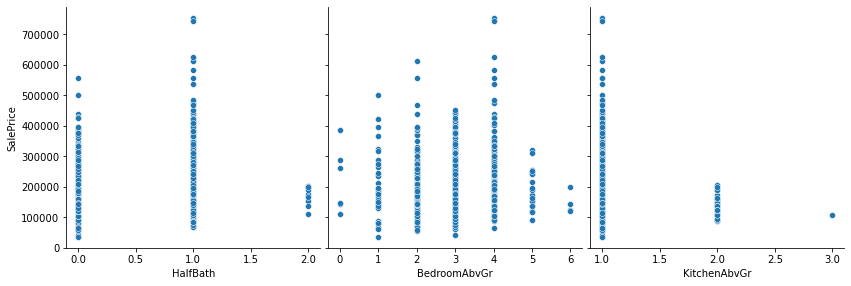

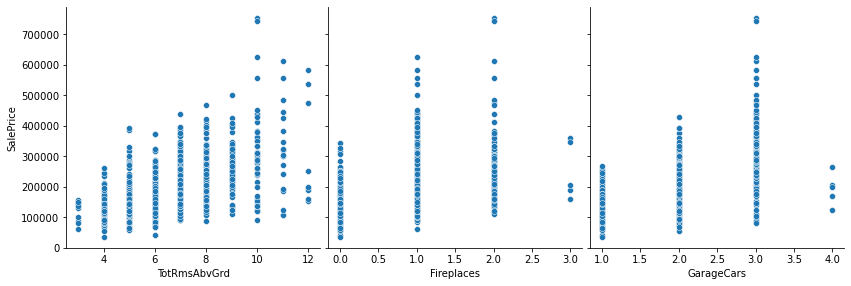

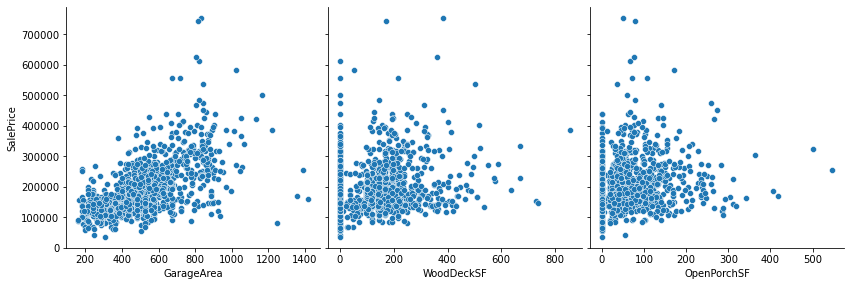

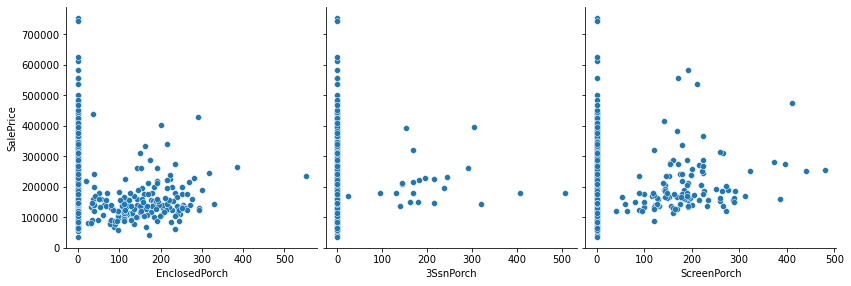

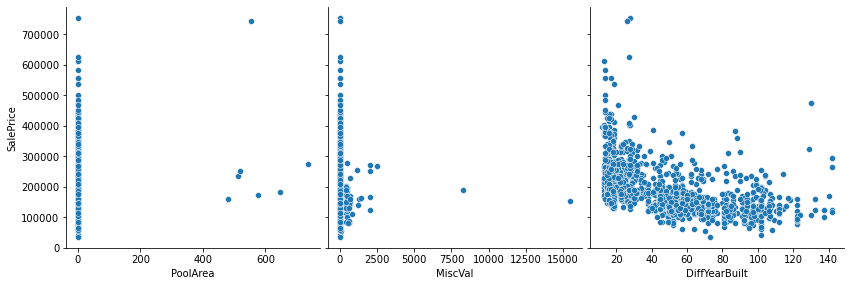

In [74]:
x_array = []
plt.figure(figsize=(10,5))
for index, column in enumerate(numericalColumn):
    x_array.append(column)
    if(index%3==0):
        sns.pairplot(housingDF, x_vars=x_array, y_vars=outComeColumn,height=4, aspect=1,kind='scatter')
        x_array = []
plt.show()

### 4.3 Categorical Column Analysis

<Figure size 432x288 with 0 Axes>

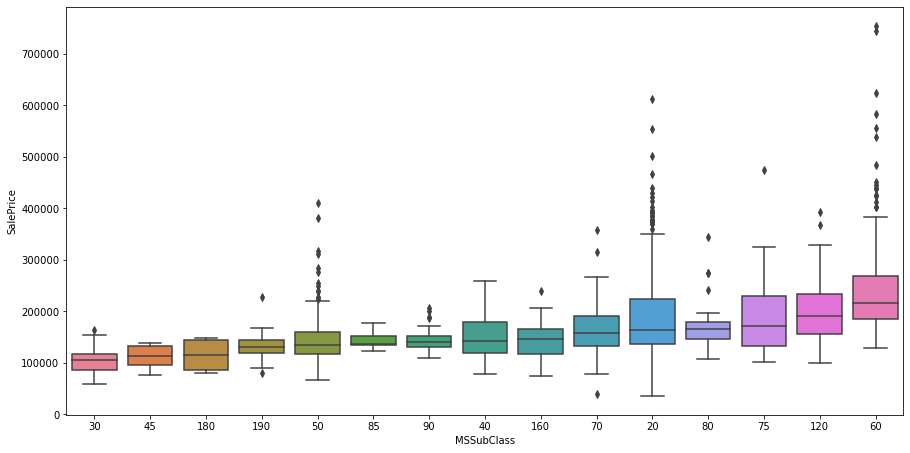

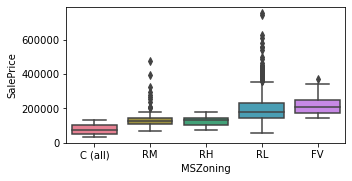

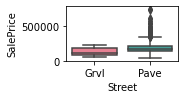

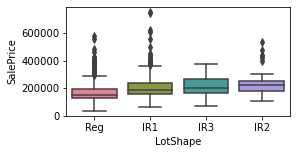

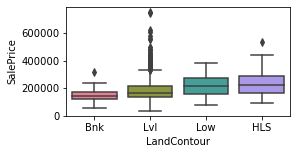

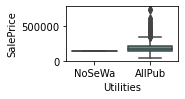

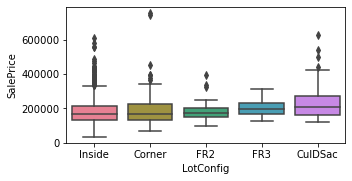

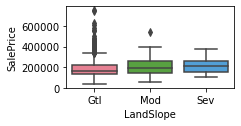

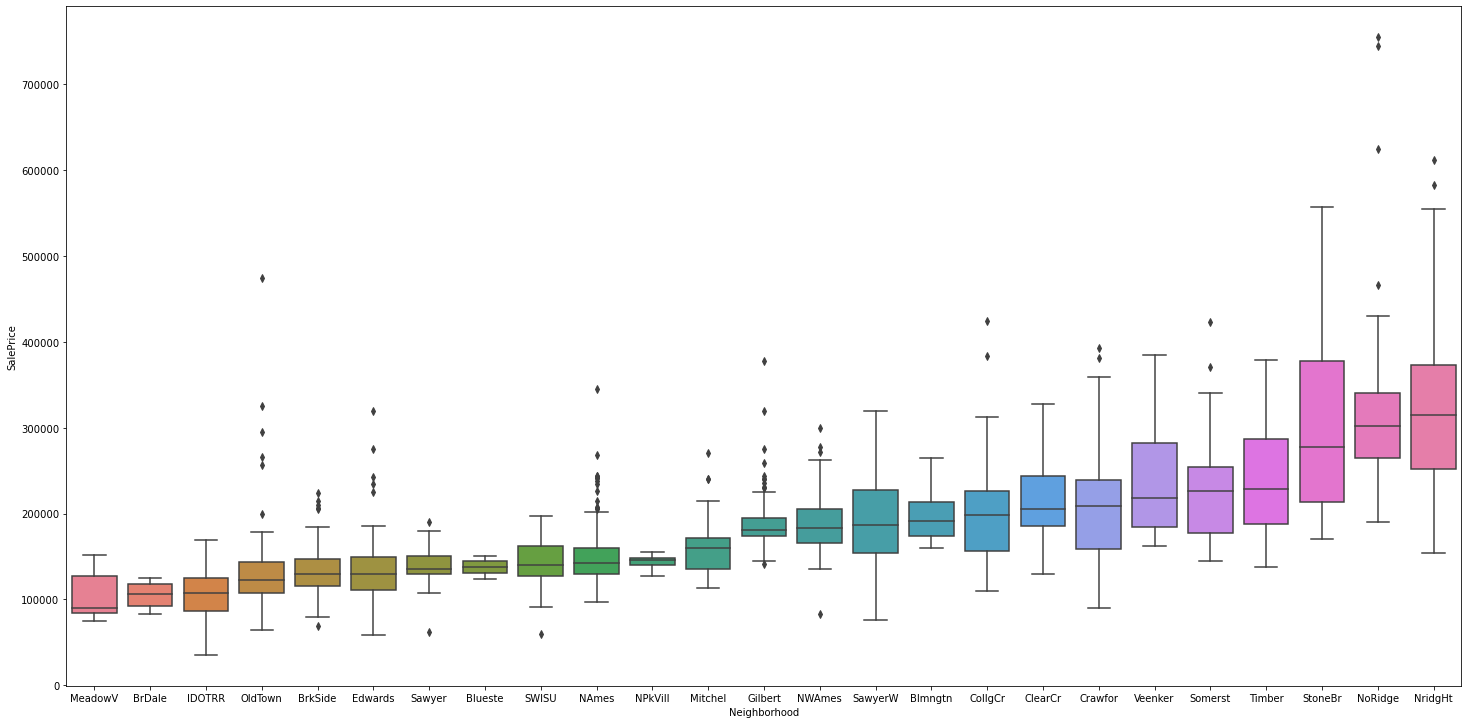

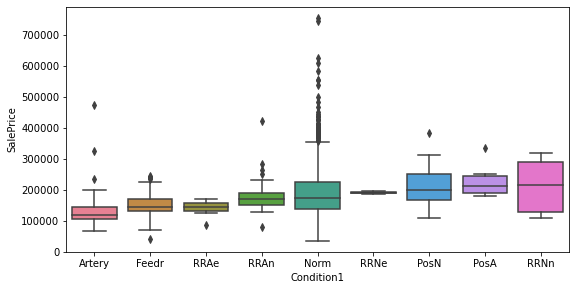

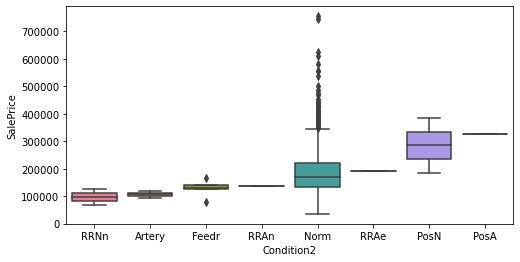

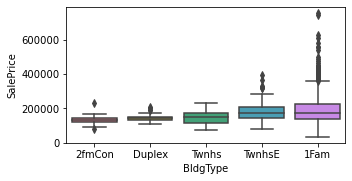

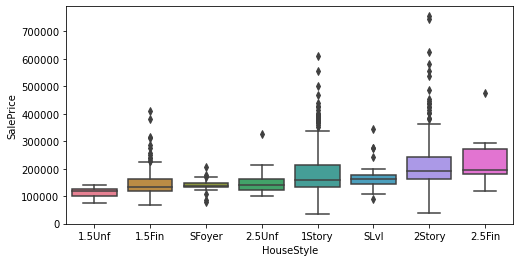

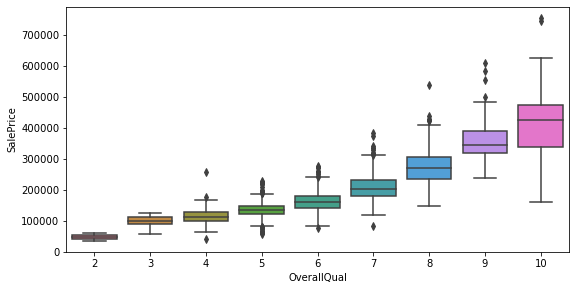

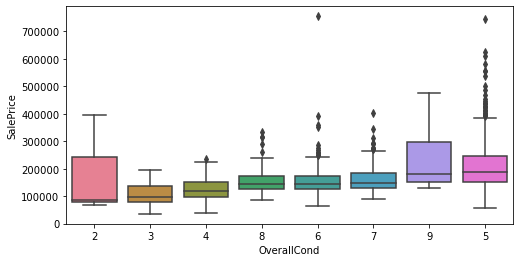

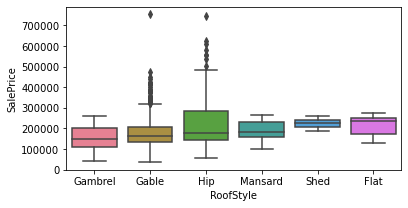

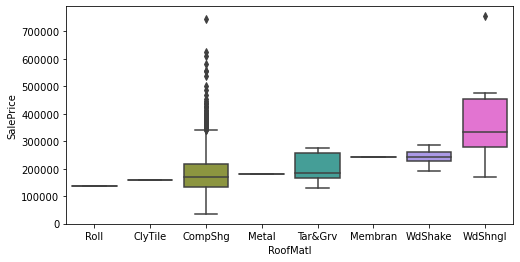

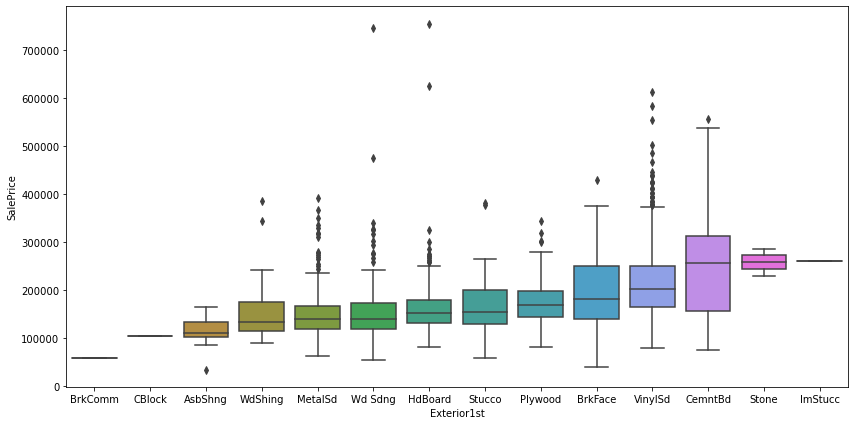

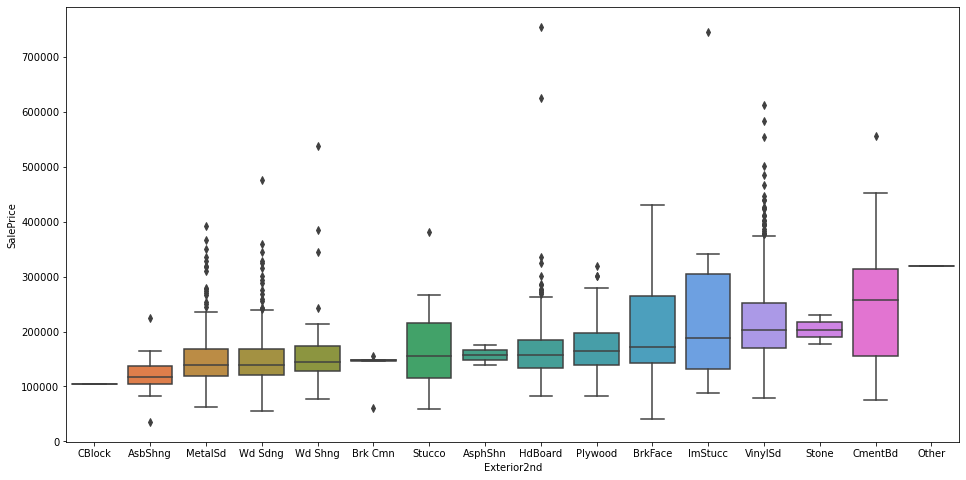

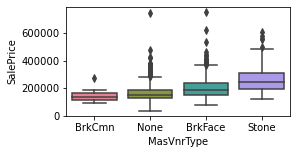

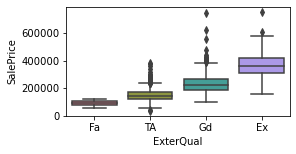

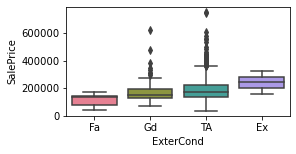

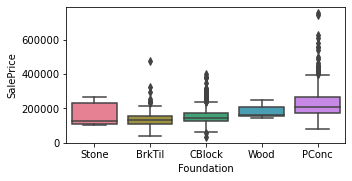

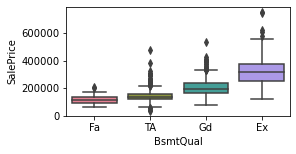

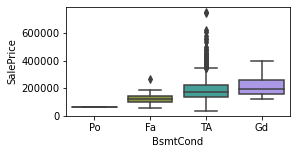

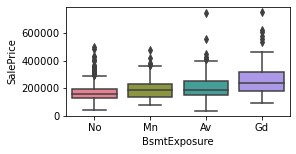

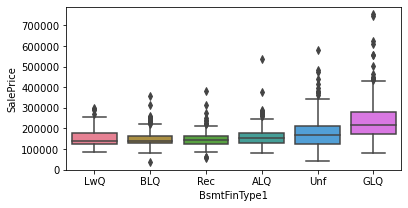

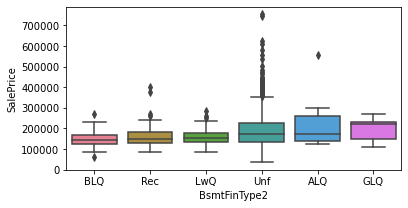

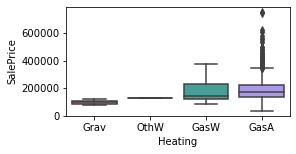

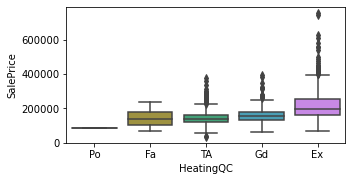

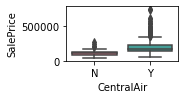

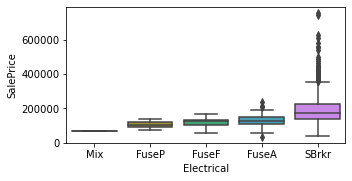

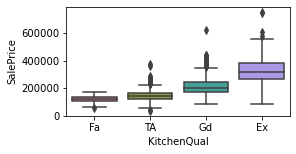

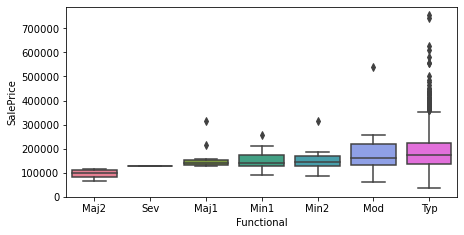

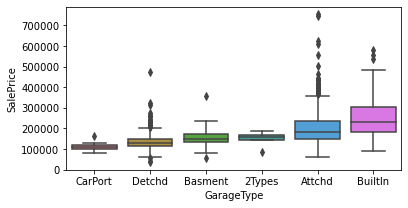

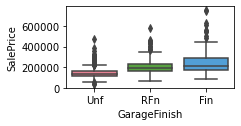

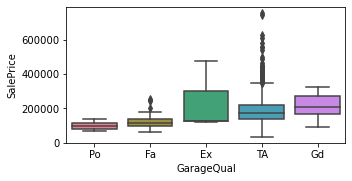

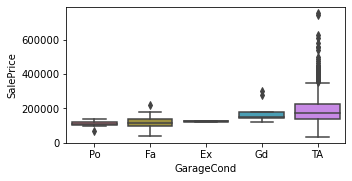

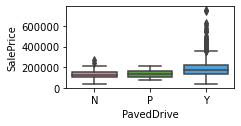

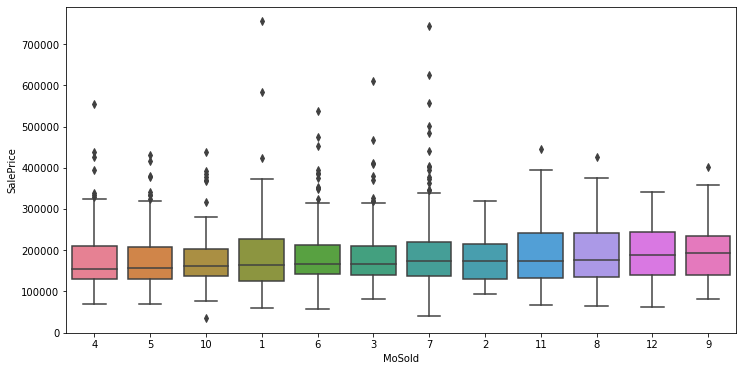

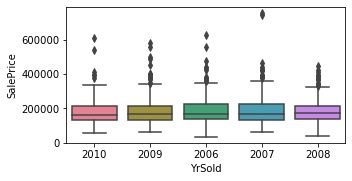

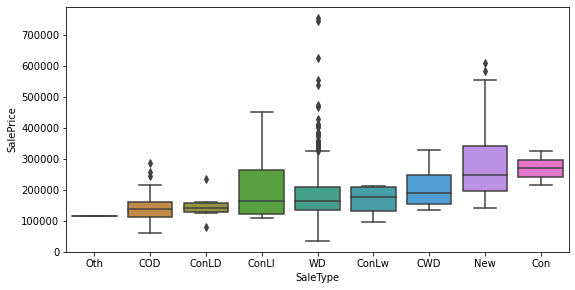

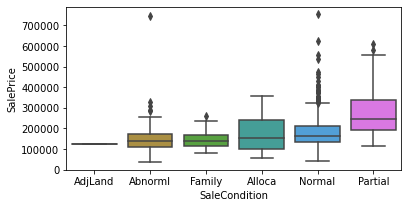

In [75]:
for index, column in enumerate(categoricalColumn):
    plt.figure(index)
    variables = housingDF[[column]].nunique()
    plt.figure(figsize=(variables,variables/2))
    categoricalOrder = housingDF[[column,outComeColumn]].groupby(by=[column])[outComeColumn].median().sort_values(ascending=True)
    sns.boxplot(x=column, y=outComeColumn, data=housingDF[[column,outComeColumn]], order=categoricalOrder.index, palette='husl')

### 4.4 Plotting correlations on a heatmap

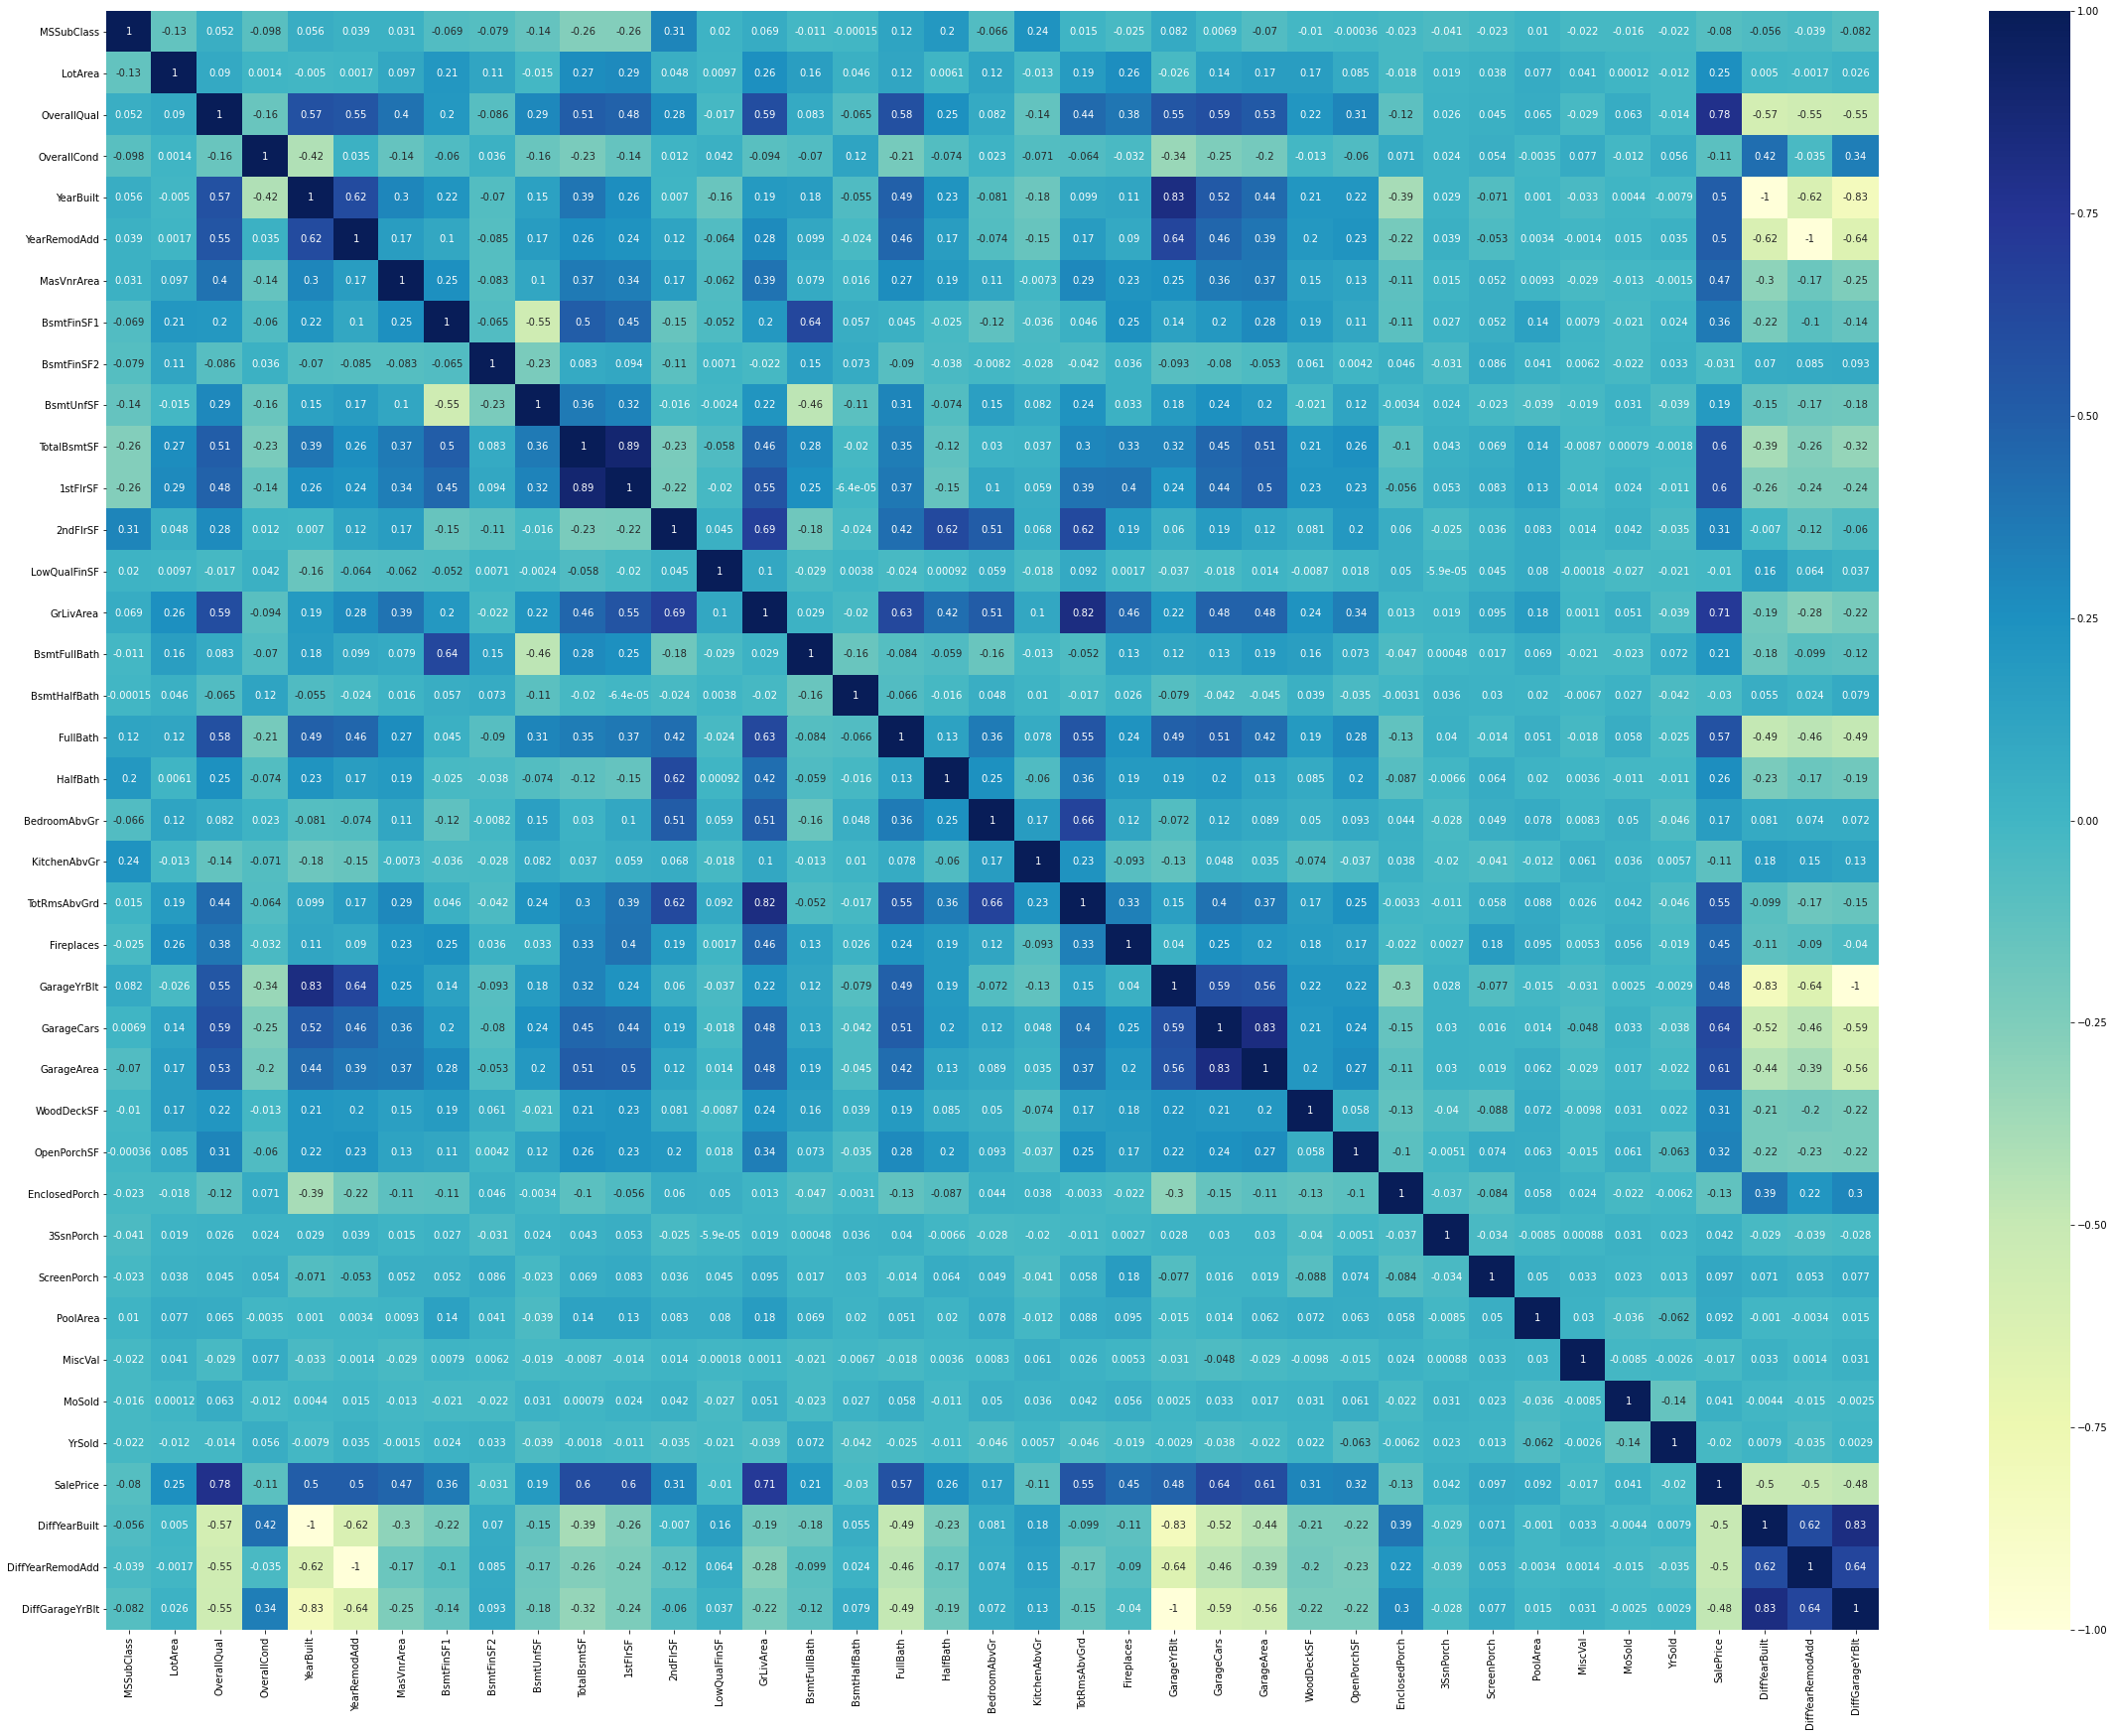

In [76]:
plt.figure(figsize=(40,30))
sns.heatmap(housingDF.corr(), cmap="YlGnBu", annot=True)
plt.show()

### 4.5 Summery of Exploratory Data Analysis

 - from 4.1 we can say the target value seems to be normalized with some noise.
 - from 4.2.2 we can say that 1stFlrSF, GrLivArea seems to be showing correlation towards right
 - from 4.2.2 we can say that rest of the variables are too scattered and hence can be understood during further analysis
 - from 4.4 we can say that we do have collinearity in data

## Step 5: Data Preparation

### 5.1 Dumify Categorical Fields

In [77]:
# Dumifying all columns using a loop
for col in categoricalColumn:
    # Let's drop the first column from dummy df using 'drop_first = True' otherwise it will get multicollinear
    dummies = pd.get_dummies(housingDF[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    dummies = dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    housingDF = pd.concat([housingDF, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    housingDF.drop([col], axis = 1, inplace = True)

housingDF.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,2003,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
1,9600,1976,1976,0.0,978,0,284,1262,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,11250,2001,2002,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
3,9550,1915,1970,0.0,216,0,540,756,961,756,...,0,0,0,0,1,0,0,0,0,0
4,14260,2000,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0


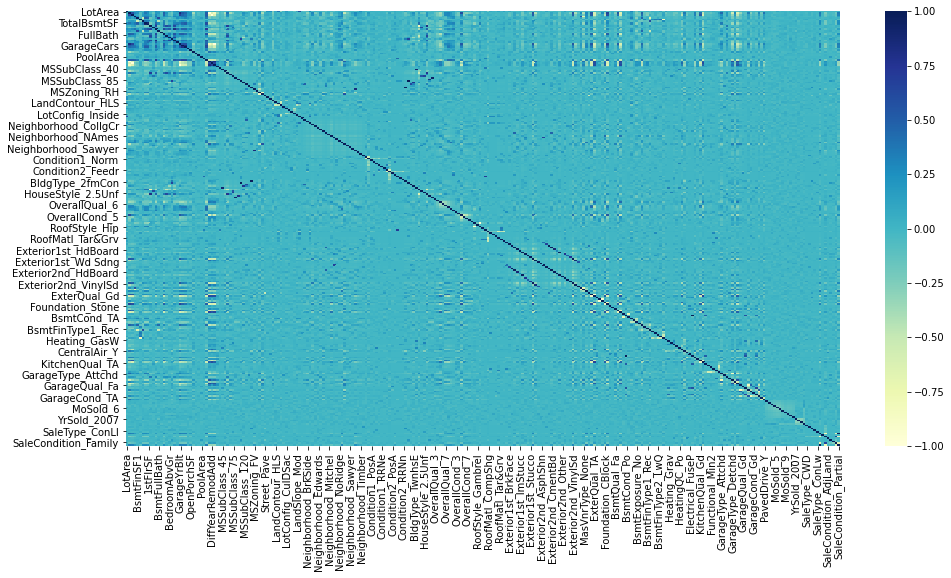

In [78]:
plt.figure(figsize=(16,8))
sns.heatmap(housingDF.corr(), cmap="YlGnBu", annot=False)
plt.show()

Summary:
 - The heatmap is very condensed and we do have a lot of collinearity in data, hence feature selection is necessary.

#### 5.2 Data Preparation for Modelling

##### Removing outliers > +3 Std. Deviation or < -3 Std. Deviation 

In [79]:
from scipy import stats
z = np.abs(stats.zscore(housingDF[numericalColumn]))
# Outlier Removed Records
selected = housingDF[numericalColumn][(z < 3).all(axis=1)]
housingDF = housingDF.loc[selected.index]
housingDF

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,2003,2003,196.0,706,0,150,856,856,854,...,0,0,0,0,1,0,0,0,1,0
2,11250,2001,2002,162.0,486,0,434,920,920,866,...,0,0,0,0,1,0,0,0,1,0
4,14260,2000,2000,350.0,655,0,490,1145,1145,1053,...,0,0,0,0,1,0,0,0,1,0
6,10084,2004,2005,186.0,1369,0,317,1686,1694,0,...,0,0,0,0,1,0,0,0,1,0
10,11200,1965,1965,0.0,906,0,134,1040,1040,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,9262,2008,2009,194.0,0,0,1573,1573,1578,0,...,0,0,1,0,0,0,0,0,0,1
1452,3675,2005,2005,80.0,547,0,0,547,1072,0,...,0,0,0,0,1,0,0,0,1,0
1454,7500,2004,2005,0.0,410,0,811,1221,1221,0,...,0,0,0,0,1,0,0,0,1,0
1455,7917,1999,2000,0.0,0,0,953,953,953,694,...,0,0,0,0,1,0,0,0,1,0


#### 5.3 Train Test Split

In [81]:
y = housingDF.loc[:, outComeColumn]
X = housingDF.loc[:, housingDF.columns != outComeColumn]

# scale
scaler = StandardScaler()
scaler.fit(X)

# split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [82]:
# linear regression with all predictors
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9528333512101549
0.8984820444406529


#### 5.4 Simple Linear Regression Model

In [83]:
# Model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-526128.735, 'constant'),
 (-63863.821, 'MSSubClass_180'),
 (62640.815, 'SaleCondition_AdjLand'),
 (-53248.349, 'MSSubClass_85'),
 (47012.779, 'HouseStyle_SFoyer'),
 (44092.321, 'OverallQual_9'),
 (-42957.4, 'SaleCondition_Alloca'),
 (42036.962, 'MSZoning_FV'),
 (39549.886, 'HouseStyle_1.5Unf'),
 (39209.612, 'OverallQual_10'),
 (-37944.635, 'MSSubClass_80'),
 (36826.987, 'Exterior2nd_CmentBd'),
 (-36522.122, 'Neighborhood_MeadowV'),
 (-35873.347, 'MSSubClass_160'),
 (-33144.306, 'Functional_Mod'),
 (30698.139, 'SaleCondition_Partial'),
 (-30551.207, 'MSSubClass_90'),
 (-30551.207, 'BldgType_Duplex'),
 (30452.485, 'HouseStyle_SLvl'),
 (30308.413, 'OverallCond_9'),
 (-29947.172, 'MSSubClass_45'),
 (-29489.098, 'RoofMatl_WdShake'),
 (29459.633, 'MSZoning_RH'),
 (27882.273, 'OverallCond_8'),
 (26553.494, 'MSZoning_RL'),
 (-26510.601, 'SaleType_ConLI'),
 (26438.286, 'Foundation_Stone'),
 (26359.862, 'Condition1_RRNn'),
 (25205.134, 'Functional_Typ'),
 (23830.594, 'Neighborhood_StoneBr'),


In [87]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
modelCrossValidation = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
modelCrossValidation.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
crossValidationResults = pd.DataFrame(modelCrossValidation.cv_results_)
crossValidationResults = crossValidationResults[crossValidationResults['param_alpha']<=200]
crossValidationResults.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006783,0.000635,0.003491,0.000497,0.0001,{'alpha': 0.0001},-20040.256818,-17967.075902,-15258.901538,-17502.421801,...,-17616.949834,1527.025095,26,-8737.003001,-8945.166118,-9844.210751,-9291.960715,-9425.734304,-9248.814978,385.178467
1,0.005890,0.000600,0.002896,0.000184,0.001,{'alpha': 0.001},-20027.830659,-17759.392909,-15181.867438,-17467.724044,...,-17541.619505,1541.145264,25,-8739.359052,-8951.056300,-9847.929777,-9292.639738,-9427.303278,-9251.657629,384.936980
2,0.005553,0.000213,0.002770,0.000194,0.01,{'alpha': 0.01},-19898.767497,-16814.836486,-14864.608162,-17201.725579,...,-17149.608560,1607.907567,24,-8758.827889,-8991.596631,-9875.386254,-9298.375155,-9438.644122,-9272.566010,383.278214
3,0.005627,0.000269,0.002889,0.000217,0.05,{'alpha': 0.05},-19387.795251,-16084.056206,-14262.329824,-16586.477091,...,-16545.029506,1644.749269,23,-8817.485726,-9050.513803,-9951.254475,-9323.263753,-9467.278612,-9321.959274,386.084982
4,0.005419,0.000168,0.002912,0.000264,0.1,{'alpha': 0.1},-18968.234339,-15768.549106,-13827.787686,-16208.502370,...,-16164.238946,1642.766428,21,-8871.944933,-9090.693200,-10013.223890,-9357.765057,-9492.690014,-9365.263419,388.561055


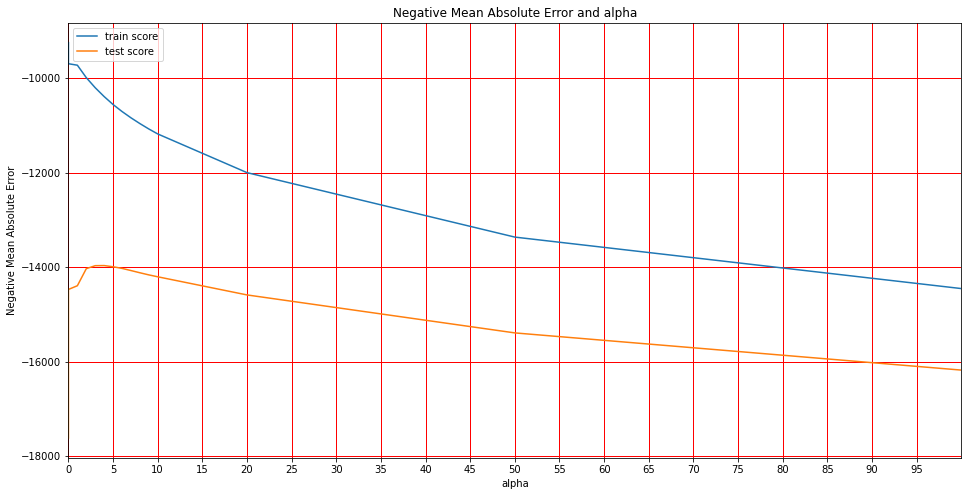

In [67]:
# plotting mean test and train scoes with alpha 
crossValidationResults['param_alpha'] = crossValidationResults['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(crossValidationResults['param_alpha'], crossValidationResults['mean_train_score'])
plt.plot(crossValidationResults['param_alpha'], crossValidationResults['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [90]:
alpha = 4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9460249894962848
0.9152898297301237


In [91]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-484524.206, 'constant'),
 (26508.528, 'OverallQual_9'),
 (21072.822, 'Neighborhood_StoneBr'),
 (-17360.768, 'KitchenQual_Gd'),
 (17017.168, 'Functional_Typ'),
 (-16934.519, 'KitchenQual_TA'),
 (16306.799, 'Neighborhood_Crawfor'),
 (-15955.873, 'Functional_Mod'),
 (-15133.388, 'Neighborhood_MeadowV'),
 (-12748.031, 'SaleCondition_Alloca'),
 (12522.33, 'Exterior1st_BrkFace'),
 (11717.671, 'SaleCondition_Partial'),
 (-11558.389, 'OverallCond_3'),
 (-10949.877, 'Condition1_RRAe'),
 (-10826.345, 'MSSubClass_160'),
 (10825.35, 'BsmtExposure_Gd'),
 (-10550.902, 'Neighborhood_Edwards'),
 (-10502.732, 'KitchenQual_Fa'),
 (10327.416, 'MSZoning_FV'),
 (10207.03, 'OverallQual_10'),
 (-9935.215, 'OverallQual_4'),
 (9581.424, 'OverallCond_8'),
 (-9395.542, 'OverallQual_6'),
 (8705.198, 'BsmtFinType1_GLQ'),
 (8551.531, 'MasVnrType_Stone'),
 (-8479.422, 'BsmtQual_Gd'),
 (8322.03, 'Neighborhood_BrDale'),
 (8248.003, 'Condition1_Norm'),
 (-8213.917, 'BsmtQual_TA'),
 (-8094.663, 'Neighborhood_NWAmes')

Summary:

 - Ridge regression gave us a complex model with most of the coefficients as non-zero values.
 - Ridge regression has not helped us in the feature selection.

#### 5.5 Continuing with Lasso Regression

In [92]:
lasso = Lasso()

# cross validation
modelCrossValidation = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

modelCrossValidation.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [94]:
crossValidationResults = pd.DataFrame(modelCrossValidation.cv_results_)
crossValidationResults.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.068738,0.005895,0.002867,0.000185,0.0001,{'alpha': 0.0001},-20354.989290,-17139.509653,-15146.586233,-17522.701449,...,-17488.137806,1665.476378,27,-8739.546114,-8997.068544,-9855.239799,-9294.859731,-9430.943130,-9263.531464,380.707240
1,0.064020,0.000812,0.002560,0.000067,0.001,{'alpha': 0.001},-20351.941084,-17131.209484,-15144.100412,-17519.524150,...,-17483.646574,1665.599763,26,-8739.570861,-8997.070072,-9855.245437,-9294.846648,-9430.947550,-9263.536114,380.702141
2,0.066689,0.002579,0.002926,0.000372,0.01,{'alpha': 0.01},-20322.990556,-17056.620745,-15118.840954,-17486.896703,...,-17440.481851,1667.230864,25,-8739.937154,-8997.225114,-9855.416348,-9294.854997,-9431.030123,-9263.692747,380.640152
3,0.064978,0.001369,0.002690,0.000094,0.05,{'alpha': 0.05},-20303.619698,-16981.060842,-15078.585628,-17415.147825,...,-17356.992132,1681.741279,24,-8741.822025,-8998.252448,-9857.015693,-9295.137387,-9431.705720,-9264.786655,380.539318
4,0.063541,0.001620,0.002558,0.000078,0.1,{'alpha': 0.1},-20264.859289,-16955.900975,-15028.055928,-17393.540778,...,-17310.196283,1687.123558,23,-8744.295160,-8999.585884,-9859.435085,-9295.617117,-9432.800541,-9266.346758,380.530318


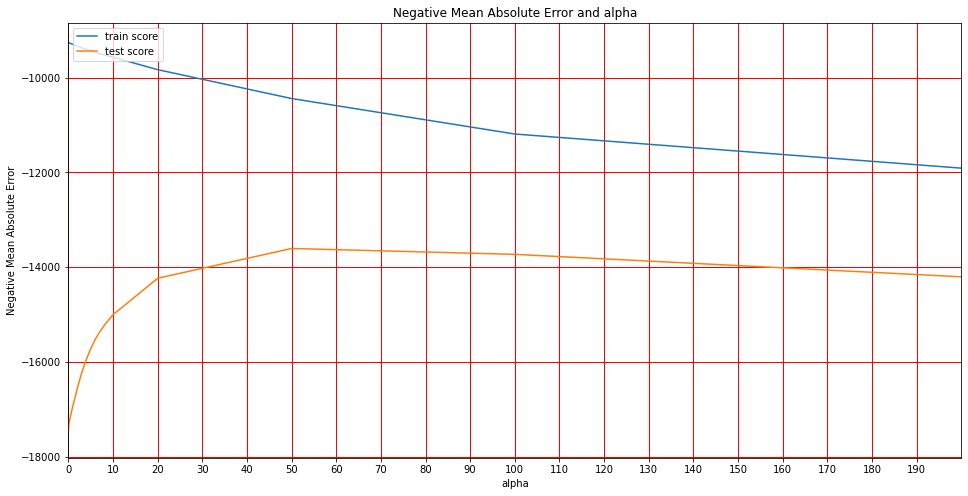

In [95]:
# plotting mean test and train scoes with alpha 
crossValidationResults['param_alpha'] = crossValidationResults['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(crossValidationResults['param_alpha'], crossValidationResults['mean_train_score'])
plt.plot(crossValidationResults['param_alpha'], crossValidationResults['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='r', linestyle='-', linewidth=1)
plt.show()

In [96]:
alpha =50
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9451804944627855
0.9145348792017314


In [97]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_selected_features = []
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    lasso_selected_features.append(v)
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-1750215.708, 'constant'),
 (44090.81, 'OverallQual_9'),
 (28811.319, 'OverallQual_10'),
 (-28616.24, 'SaleCondition_Alloca'),
 (27458.272, 'Neighborhood_StoneBr'),
 (-27408.595, 'Functional_Mod'),
 (23028.136, 'Neighborhood_Crawfor'),
 (-22777.991, 'Neighborhood_MeadowV'),
 (-19807.934, 'KitchenQual_TA'),
 (-19293.312, 'KitchenQual_Gd'),
 (18086.014, 'SaleCondition_Partial'),
 (17443.443, 'Exterior1st_BrkFace'),
 (15927.706, 'Functional_Typ'),
 (15336.547, 'OverallQual_8'),
 (-14376.206, 'Condition1_RRAe'),
 (-13807.831, 'KitchenQual_Fa'),
 (-13204.071, 'MSSubClass_160'),
 (12439.447, 'BsmtExposure_Gd'),
 (10677.755, 'MSZoning_FV'),
 (10541.689, 'Neighborhood_NoRidge'),
 (10172.209, 'Neighborhood_BrkSide'),
 (9456.502, 'OverallCond_8'),
 (8633.016, 'MasVnrType_Stone'),
 (8270.356, 'Exterior1st_CemntBd'),
 (-8254.628, 'OverallCond_3'),
 (8002.555, 'BsmtFinType1_GLQ'),
 (-7815.645, 'Neighborhood_Edwards'),
 (-7740.807, 'OverallCond_5'),
 (6881.349, 'Condition1_Norm'),
 (-6532.466, 'Bs

Summary:

 - Lasso Regression gave us a simpler model with most of the coefficients as zero values.
 - Lasso Regression has helped us in the feature selection.

### Step 6: Building the Model
Since the number of columns is more, we will first use automated selection of predictor, when no of column is manageable, we first build a model with all the columns, and then keep removing the columns based upon Statistical Significance and Co-Linearity.<br>
We will stop when we notice that there is no further improvement in the R2 value or all variables are statistically significant with low VIF.

<b>There wil be several iterations before getting the perfect model, so please bear with me!</b>

#### 6.1 Automated selection of Predictors (RFE)

In [98]:
# Running RFE with the output number of the variable equal to 30
rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [99]:
# Listing out the top 30 columns that are selected in RFE (Automated selection of Predictors)
auto_selected_predictors = X_train.columns[rfe.support_]
auto_selected_predictors

Index(['YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt',
       'DiffYearBuilt', 'DiffYearRemodAdd', 'DiffGarageYrBlt', 'MSSubClass_75',
       'MSSubClass_90', 'Condition2_Feedr', 'Condition2_Norm',
       'Condition2_RRNn', 'BldgType_Duplex', 'HouseStyle_2.5Unf',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofMatl_Tar&Grv', 'GarageType_Attchd',
       'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageQual_Fa',
       'GarageQual_Gd', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd',
       'GarageCond_Po', 'GarageCond_TA'],
      dtype='object')

In [114]:
# Function to displaying linear regression statistics
def getStatisticsOfLinearModel(column):
    cols=list(column)
        
    # Adding constant
    X_train_lm = sm.add_constant(X_train[column])
    
    # Creating the first model
    lr = sm.OLS(y_train, X_train_lm).fit()
    
    # Displaying the parameter obtained
    display(HTML('<hr></hr>'))
    display(HTML(f'<h4>Parameters obtained for</h4>'))
    print(f'{cols}')
    display(HTML('<hr></hr>'))
    print(lr.params)
    display(HTML('<hr></hr>'))
    
    # Displaying the summary of the linear regression model
    display(HTML('<h4>Summery of Linear Regression Model</h4>'))
    print(lr.summary())
    display(HTML('<hr></hr>'))
    
    # Displaying VIF values
    display(HTML('<h4>VIF values</h4>'))
    display(HTML('<hr></hr>'))
    vif = pd.DataFrame()
    vif['Features'] = X_train[column].columns
    vif['VIF'] = [variance_inflation_factor(X_train[column].values, i) for i in range(X_train[column].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    display(HTML('<hr></hr>'))

#### 6.2 Model 1: All columns selected after 6.1

In [115]:
getStatisticsOfLinearModel(list(housingDF[auto_selected_predictors]))

['YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'DiffYearBuilt', 'DiffYearRemodAdd', 'DiffGarageYrBlt', 'MSSubClass_75', 'MSSubClass_90', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_RRNn', 'BldgType_Duplex', 'HouseStyle_2.5Unf', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofMatl_Tar&Grv', 'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA']


const                    -0.168001
YearBuilt               112.507743
YearRemodAdd              0.453545
1stFlrSF                124.806998
2ndFlrSF                 81.627518
GarageYrBlt             -83.685509
DiffYearBuilt          -452.206658
DiffYearRemodAdd       -340.152459
DiffGarageYrBlt        -256.013405
MSSubClass_75          7874.848618
MSSubClass_90         -4091.462699
Condition2_Feedr     -11850.173253
Condition2_Norm      -17160.020296
Condition2_RRNn       29010.025548
BldgType_Duplex       -4091.462699
HouseStyle_2.5Unf      7874.848618
RoofStyle_Gable        2201.645464
RoofStyle_Gambrel     20579.588696
RoofStyle_Hip         17391.624914
RoofStyle_Mansard    -37493.082162
RoofMatl_Tar&Grv      -2679.944914
GarageType_Attchd     18988.307936
GarageType_BuiltIn    20297.836146
GarageType_Detchd     19687.467509
GarageQual_Fa         -5652.002023
GarageQual_Gd          9111.844905
GarageQual_TA         -4130.908857
GarageCond_Fa         -2947.228815
GarageCond_Gd       

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     110.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.70e-205
Time:                        13:10:21   Log-Likelihood:                -8091.7
No. Observations:                 688   AIC:                         1.623e+04
Df Residuals:                     665   BIC:                         1.633e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1680      0

              Features    VIF
0            YearBuilt    inf
14   HouseStyle_2.5Unf    inf
28       GarageCond_Po    inf
27       GarageCond_Gd    inf
26       GarageCond_Fa    inf
25       GarageQual_TA    inf
24       GarageQual_Gd    inf
23       GarageQual_Fa    inf
19    RoofMatl_Tar&Grv    inf
18   RoofStyle_Mansard    inf
17       RoofStyle_Hip    inf
16   RoofStyle_Gambrel    inf
1         YearRemodAdd    inf
15     RoofStyle_Gable    inf
13     BldgType_Duplex    inf
12     Condition2_RRNn    inf
11     Condition2_Norm    inf
10    Condition2_Feedr    inf
9        MSSubClass_90    inf
8        MSSubClass_75    inf
7      DiffGarageYrBlt    inf
6     DiffYearRemodAdd    inf
5        DiffYearBuilt    inf
4          GarageYrBlt    inf
29       GarageCond_TA    inf
20   GarageType_Attchd  20.34
22   GarageType_Detchd  18.24
21  GarageType_BuiltIn   6.42
2             1stFlrSF   1.58
3             2ndFlrSF   1.47


#### 6.3 Model 2: All columns selected after 6.2

In [116]:
getStatisticsOfLinearModel(list(housingDF[lasso_selected_features]))

['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Functional_Mod', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'Functional_Typ', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'OverallCond_8', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']


const                    211555.786196
OverallQual_9             91607.338623
OverallQual_10            72474.274804
SaleCondition_Alloca     -64806.887443
Neighborhood_StoneBr      32001.856483
Functional_Mod            -6000.629520
Neighborhood_Crawfor      40134.212919
Neighborhood_MeadowV     -76764.002034
KitchenQual_TA           -64442.203727
KitchenQual_Gd           -40290.938904
SaleCondition_Partial     23462.843058
Exterior1st_BrkFace       33773.480090
Functional_Typ              401.787140
OverallQual_8             39953.695339
Condition1_RRAe          -21186.983169
KitchenQual_Fa           -77402.552616
MSSubClass_160           -27473.423254
BsmtExposure_Gd           28714.446857
MSZoning_FV                5742.769832
Neighborhood_NoRidge      65159.574267
Neighborhood_BrkSide      -4940.309241
OverallCond_8              4139.014451
MasVnrType_Stone          16238.761112
Exterior1st_CemntBd       17326.977621
OverallCond_3            -22275.023131
BsmtFinType1_GLQ         

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     79.86
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          6.49e-197
Time:                        13:11:44   Log-Likelihood:                -8092.8
No. Observations:                 688   AIC:                         1.625e+04
Df Residuals:                     657   BIC:                         1.639e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.116e+

                 Features   VIF
11         Functional_Typ  3.61
24       BsmtFinType1_GLQ  2.33
22    Exterior1st_CemntBd  1.84
7          KitchenQual_TA  1.72
8          KitchenQual_Gd  1.71
0           OverallQual_9  1.67
26          OverallCond_5  1.66
6    Neighborhood_MeadowV  1.65
12          OverallQual_8  1.63
27        Condition1_Norm  1.56
21       MasVnrType_Stone  1.56
14         KitchenQual_Fa  1.41
9   SaleCondition_Partial  1.38
17            MSZoning_FV  1.37
15         MSSubClass_160  1.32
4          Functional_Mod  1.24
16        BsmtExposure_Gd  1.23
23          OverallCond_3  1.23
3    Neighborhood_StoneBr  1.23
20          OverallCond_8  1.22
1          OverallQual_10  1.19
18   Neighborhood_NoRidge  1.16
19   Neighborhood_BrkSide  1.14
5    Neighborhood_Crawfor  1.13
25   Neighborhood_Edwards  1.13
13        Condition1_RRAe  1.12
10    Exterior1st_BrkFace  1.11
29          GarageCond_Fa  1.09
2    SaleCondition_Alloca  1.05
28            BsmtQual_TA  0.31


#### 6.4 Model 3: Removing 'Functional_Typ' due to high P-Value

In [117]:
lasso_selected_features.remove('Functional_Typ')
getStatisticsOfLinearModel(list(housingDF[lasso_selected_features]))

['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Functional_Mod', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'OverallCond_8', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']


const                    211932.673435
OverallQual_9             91627.401478
OverallQual_10            72494.448562
SaleCondition_Alloca     -64793.601281
Neighborhood_StoneBr      31976.977889
Functional_Mod            -6356.819275
Neighborhood_Crawfor      40138.519223
Neighborhood_MeadowV     -76703.816419
KitchenQual_TA           -64446.979291
KitchenQual_Gd           -40287.996529
SaleCondition_Partial     23482.620308
Exterior1st_BrkFace       33769.364246
OverallQual_8             39958.107859
Condition1_RRAe          -21229.453801
KitchenQual_Fa           -77388.680614
MSSubClass_160           -27520.605959
BsmtExposure_Gd           28700.948129
MSZoning_FV                5762.989332
Neighborhood_NoRidge      65161.515573
Neighborhood_BrkSide      -4933.053504
OverallCond_8              4106.051988
MasVnrType_Stone          16214.348180
Exterior1st_CemntBd       17311.307045
OverallCond_3            -22301.827629
BsmtFinType1_GLQ          13775.427711
Neighborhood_Edwards     

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.73
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          7.08e-198
Time:                        13:14:09   Log-Likelihood:                -8092.8
No. Observations:                 688   AIC:                         1.625e+04
Df Residuals:                     658   BIC:                         1.638e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.119e+

                 Features   VIF
23       BsmtFinType1_GLQ  2.25
21    Exterior1st_CemntBd  1.83
6    Neighborhood_MeadowV  1.65
25          OverallCond_5  1.62
11          OverallQual_8  1.61
20       MasVnrType_Stone  1.56
0           OverallQual_9  1.52
26        Condition1_Norm  1.47
16            MSZoning_FV  1.37
9   SaleCondition_Partial  1.36
14         MSSubClass_160  1.31
13         KitchenQual_Fa  1.26
3    Neighborhood_StoneBr  1.23
22          OverallCond_3  1.23
15        BsmtExposure_Gd  1.22
19          OverallCond_8  1.22
1          OverallQual_10  1.17
4          Functional_Mod  1.17
17   Neighborhood_NoRidge  1.16
18   Neighborhood_BrkSide  1.14
7          KitchenQual_TA  1.13
5    Neighborhood_Crawfor  1.13
12        Condition1_RRAe  1.12
24   Neighborhood_Edwards  1.12
8          KitchenQual_Gd  1.11
10    Exterior1st_BrkFace  1.10
28          GarageCond_Fa  1.08
2    SaleCondition_Alloca  1.05
27            BsmtQual_TA  0.30


#### 6.5 Model 4: Removing 'Functional_Mod' due to high P-Value

In [118]:
lasso_selected_features.remove('Functional_Mod')
getStatisticsOfLinearModel(list(housingDF[lasso_selected_features]))

['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'OverallCond_8', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']


const                    211854.098572
OverallQual_9             91646.311525
OverallQual_10            72507.796095
SaleCondition_Alloca     -64714.770585
Neighborhood_StoneBr      31955.375853
Neighborhood_Crawfor      40179.705046
Neighborhood_MeadowV     -76466.582073
KitchenQual_TA           -64509.499322
KitchenQual_Gd           -40265.705617
SaleCondition_Partial     23492.508700
Exterior1st_BrkFace       33791.191771
OverallQual_8             39965.133130
Condition1_RRAe          -21263.202470
KitchenQual_Fa           -77430.305715
MSSubClass_160           -27395.865096
BsmtExposure_Gd           28705.992969
MSZoning_FV                5721.574246
Neighborhood_NoRidge      65164.544601
Neighborhood_BrkSide      -4873.291446
OverallCond_8              4140.113008
MasVnrType_Stone          16210.228726
Exterior1st_CemntBd       17333.310659
OverallCond_3            -23867.666886
BsmtFinType1_GLQ          13793.402020
Neighborhood_Edwards     -16349.785754
OverallCond_5            

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     85.80
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          8.10e-199
Time:                        13:15:48   Log-Likelihood:                -8092.9
No. Observations:                 688   AIC:                         1.624e+04
Df Residuals:                     659   BIC:                         1.638e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.119e+

                 Features   VIF
22       BsmtFinType1_GLQ  2.25
20    Exterior1st_CemntBd  1.83
5    Neighborhood_MeadowV  1.65
24          OverallCond_5  1.61
10          OverallQual_8  1.61
19       MasVnrType_Stone  1.56
0           OverallQual_9  1.52
25        Condition1_Norm  1.46
15            MSZoning_FV  1.37
8   SaleCondition_Partial  1.36
13         MSSubClass_160  1.31
12         KitchenQual_Fa  1.25
3    Neighborhood_StoneBr  1.23
18          OverallCond_8  1.22
14        BsmtExposure_Gd  1.22
1          OverallQual_10  1.17
16   Neighborhood_NoRidge  1.16
17   Neighborhood_BrkSide  1.14
6          KitchenQual_TA  1.13
4    Neighborhood_Crawfor  1.13
11        Condition1_RRAe  1.12
23   Neighborhood_Edwards  1.12
7          KitchenQual_Gd  1.11
9     Exterior1st_BrkFace  1.10
21          OverallCond_3  1.09
27          GarageCond_Fa  1.08
2    SaleCondition_Alloca  1.05
26            BsmtQual_TA  0.30


#### 6.6 Model 5: Removing 'OverallCond_8' due to high P-Value

In [119]:
lasso_selected_features.remove('OverallCond_8')
getStatisticsOfLinearModel(list(housingDF[lasso_selected_features]))

['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'Neighborhood_BrkSide', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']


const                    212926.722456
OverallQual_9             91357.734121
OverallQual_10            72242.997361
SaleCondition_Alloca     -64645.189868
Neighborhood_StoneBr      31791.000668
Neighborhood_Crawfor      40575.190078
Neighborhood_MeadowV     -75862.432497
KitchenQual_TA           -65002.186502
KitchenQual_Gd           -40595.949699
SaleCondition_Partial     23433.923444
Exterior1st_BrkFace       33688.408672
OverallQual_8             39973.874765
Condition1_RRAe          -20375.591436
KitchenQual_Fa           -78381.131569
MSSubClass_160           -27483.520617
BsmtExposure_Gd           28806.072944
MSZoning_FV                5747.212473
Neighborhood_NoRidge      64987.787125
Neighborhood_BrkSide      -4803.086279
MasVnrType_Stone          16116.801177
Exterior1st_CemntBd       17163.033608
OverallCond_3            -24553.934614
BsmtFinType1_GLQ          13894.331982
Neighborhood_Edwards     -16200.716420
OverallCond_5              4575.786313
Condition1_Norm          

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     89.02
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.10e-199
Time:                        13:17:29   Log-Likelihood:                -8093.1
No. Observations:                 688   AIC:                         1.624e+04
Df Residuals:                     660   BIC:                         1.637e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.129e+

                 Features   VIF
21       BsmtFinType1_GLQ  2.24
19    Exterior1st_CemntBd  1.83
5    Neighborhood_MeadowV  1.64
10          OverallQual_8  1.61
18       MasVnrType_Stone  1.55
0           OverallQual_9  1.51
23          OverallCond_5  1.51
24        Condition1_Norm  1.46
15            MSZoning_FV  1.37
8   SaleCondition_Partial  1.36
13         MSSubClass_160  1.31
12         KitchenQual_Fa  1.25
3    Neighborhood_StoneBr  1.23
14        BsmtExposure_Gd  1.22
1          OverallQual_10  1.17
16   Neighborhood_NoRidge  1.16
17   Neighborhood_BrkSide  1.14
4    Neighborhood_Crawfor  1.13
6          KitchenQual_TA  1.12
22   Neighborhood_Edwards  1.12
11        Condition1_RRAe  1.10
9     Exterior1st_BrkFace  1.10
7          KitchenQual_Gd  1.09
20          OverallCond_3  1.08
26          GarageCond_Fa  1.06
2    SaleCondition_Alloca  1.05
25            BsmtQual_TA  0.29


#### 6.7 Model 6: Removing 'Neighborhood_BrkSide' due to high P-Value

In [120]:
lasso_selected_features.remove('Neighborhood_BrkSide')
getStatisticsOfLinearModel(list(housingDF[lasso_selected_features]))

['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'MSZoning_FV', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']


const                    212474.326162
OverallQual_9             91460.977335
OverallQual_10            72472.257771
SaleCondition_Alloca     -63815.691357
Neighborhood_StoneBr      31863.853414
Neighborhood_Crawfor      40948.066014
Neighborhood_MeadowV     -75456.612663
KitchenQual_TA           -65061.358070
KitchenQual_Gd           -40405.521254
SaleCondition_Partial     23446.854316
Exterior1st_BrkFace       34014.610266
OverallQual_8             39963.958826
Condition1_RRAe          -20224.856276
KitchenQual_Fa           -79312.589350
MSSubClass_160           -27384.532673
BsmtExposure_Gd           28861.162231
MSZoning_FV                5693.322527
Neighborhood_NoRidge      64959.118763
MasVnrType_Stone          16111.409026
Exterior1st_CemntBd       16983.267848
OverallCond_3            -24182.271438
BsmtFinType1_GLQ          13959.236907
Neighborhood_Edwards     -15867.429601
OverallCond_5              4844.820216
Condition1_Norm            4972.794669
BsmtQual_TA              

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     92.49
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.47e-200
Time:                        13:20:01   Log-Likelihood:                -8093.4
No. Observations:                 688   AIC:                         1.624e+04
Df Residuals:                     661   BIC:                         1.636e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.125e+

                 Features   VIF
20       BsmtFinType1_GLQ  2.24
18    Exterior1st_CemntBd  1.83
5    Neighborhood_MeadowV  1.64
10          OverallQual_8  1.61
17       MasVnrType_Stone  1.55
0           OverallQual_9  1.51
22          OverallCond_5  1.50
23        Condition1_Norm  1.46
15            MSZoning_FV  1.37
8   SaleCondition_Partial  1.36
13         MSSubClass_160  1.31
3    Neighborhood_StoneBr  1.23
12         KitchenQual_Fa  1.22
14        BsmtExposure_Gd  1.22
1          OverallQual_10  1.17
16   Neighborhood_NoRidge  1.16
4    Neighborhood_Crawfor  1.12
6          KitchenQual_TA  1.11
21   Neighborhood_Edwards  1.11
11        Condition1_RRAe  1.10
9     Exterior1st_BrkFace  1.10
7          KitchenQual_Gd  1.09
19          OverallCond_3  1.08
25          GarageCond_Fa  1.06
2    SaleCondition_Alloca  1.05
24            BsmtQual_TA  0.29


#### 6.8 Model 7: Removing 'MSZoning_FV' due to high P-Value

In [121]:
lasso_selected_features.remove('MSZoning_FV')
getStatisticsOfLinearModel(list(housingDF[lasso_selected_features]))

['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'Condition1_Norm', 'BsmtQual_TA', 'GarageCond_Fa']


const                    212090.098373
OverallQual_9             91693.159249
OverallQual_10            73443.100653
SaleCondition_Alloca     -63875.269308
Neighborhood_StoneBr      30357.730124
Neighborhood_Crawfor      40847.901932
Neighborhood_MeadowV     -77755.465273
KitchenQual_TA           -64873.284473
KitchenQual_Gd           -39842.292811
SaleCondition_Partial     24010.594905
Exterior1st_BrkFace       34120.910180
OverallQual_8             40185.141358
Condition1_RRAe          -20474.529007
KitchenQual_Fa           -78975.425018
MSSubClass_160           -25487.828229
BsmtExposure_Gd           28378.550190
Neighborhood_NoRidge      64218.231531
MasVnrType_Stone          15782.848711
Exterior1st_CemntBd       18378.910782
OverallCond_3            -24433.621334
BsmtFinType1_GLQ          14214.488900
Neighborhood_Edwards     -16031.800019
OverallCond_5              5011.791076
Condition1_Norm            5123.299638
BsmtQual_TA              -22375.338991
GarageCond_Fa            

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     96.16
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.36e-201
Time:                        13:21:28   Log-Likelihood:                -8093.9
No. Observations:                 688   AIC:                         1.624e+04
Df Residuals:                     662   BIC:                         1.636e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.121e+

                 Features   VIF
19       BsmtFinType1_GLQ  2.23
17    Exterior1st_CemntBd  1.78
10          OverallQual_8  1.60
5    Neighborhood_MeadowV  1.60
16       MasVnrType_Stone  1.55
0           OverallQual_9  1.51
21          OverallCond_5  1.49
22        Condition1_Norm  1.46
8   SaleCondition_Partial  1.34
12         KitchenQual_Fa  1.22
14        BsmtExposure_Gd  1.21
3    Neighborhood_StoneBr  1.20
13         MSSubClass_160  1.18
1          OverallQual_10  1.17
15   Neighborhood_NoRidge  1.15
4    Neighborhood_Crawfor  1.12
6          KitchenQual_TA  1.11
20   Neighborhood_Edwards  1.11
9     Exterior1st_BrkFace  1.10
11        Condition1_RRAe  1.10
7          KitchenQual_Gd  1.08
18          OverallCond_3  1.08
24          GarageCond_Fa  1.06
2    SaleCondition_Alloca  1.05
23            BsmtQual_TA  0.29


#### 6.9 Model 8: Removing 'Condition1_Norm' due to high P-Value

In [122]:
lasso_selected_features.remove('Condition1_Norm')
getStatisticsOfLinearModel(list(housingDF[lasso_selected_features]))

['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'OverallCond_5', 'BsmtQual_TA', 'GarageCond_Fa']


const                    216603.780767
OverallQual_9             91646.914523
OverallQual_10            73667.690253
SaleCondition_Alloca     -62617.702106
Neighborhood_StoneBr      30649.441876
Neighborhood_Crawfor      41139.872407
Neighborhood_MeadowV     -77277.730201
KitchenQual_TA           -65116.568862
KitchenQual_Gd           -39921.589684
SaleCondition_Partial     23921.682325
Exterior1st_BrkFace       33763.124187
OverallQual_8             40214.451337
Condition1_RRAe          -25060.767818
KitchenQual_Fa           -80322.124212
MSSubClass_160           -25127.482430
BsmtExposure_Gd           28352.825388
Neighborhood_NoRidge      64544.706434
MasVnrType_Stone          15866.550721
Exterior1st_CemntBd       18350.600419
OverallCond_3            -23825.108575
BsmtFinType1_GLQ          14221.837540
Neighborhood_Edwards     -15667.519201
OverallCond_5              5390.754777
BsmtQual_TA              -22460.219024
GarageCond_Fa            -40502.358625
dtype: float64


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     100.0
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          4.88e-202
Time:                        13:22:52   Log-Likelihood:                -8094.7
No. Observations:                 688   AIC:                         1.624e+04
Df Residuals:                     663   BIC:                         1.635e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.166e+

                 Features   VIF
19       BsmtFinType1_GLQ  2.20
17    Exterior1st_CemntBd  1.77
5    Neighborhood_MeadowV  1.60
10          OverallQual_8  1.59
16       MasVnrType_Stone  1.55
21          OverallCond_5  1.43
0           OverallQual_9  1.42
8   SaleCondition_Partial  1.33
14        BsmtExposure_Gd  1.21
3    Neighborhood_StoneBr  1.20
12         KitchenQual_Fa  1.18
13         MSSubClass_160  1.17
1          OverallQual_10  1.15
15   Neighborhood_NoRidge  1.15
4    Neighborhood_Crawfor  1.12
9     Exterior1st_BrkFace  1.10
20   Neighborhood_Edwards  1.10
18          OverallCond_3  1.08
2    SaleCondition_Alloca  1.05
23          GarageCond_Fa  1.05
11        Condition1_RRAe  1.02
6          KitchenQual_TA  0.71
7          KitchenQual_Gd  0.66
22            BsmtQual_TA  0.29


#### 6.10 Model 9: Removing 'OverallCond_5' due to high P-Value

In [123]:
lasso_selected_features.remove('OverallCond_5')
getStatisticsOfLinearModel(list(housingDF[lasso_selected_features]))

['OverallQual_9', 'OverallQual_10', 'SaleCondition_Alloca', 'Neighborhood_StoneBr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'KitchenQual_TA', 'KitchenQual_Gd', 'SaleCondition_Partial', 'Exterior1st_BrkFace', 'OverallQual_8', 'Condition1_RRAe', 'KitchenQual_Fa', 'MSSubClass_160', 'BsmtExposure_Gd', 'Neighborhood_NoRidge', 'MasVnrType_Stone', 'Exterior1st_CemntBd', 'OverallCond_3', 'BsmtFinType1_GLQ', 'Neighborhood_Edwards', 'BsmtQual_TA', 'GarageCond_Fa']


const                    220273.194346
OverallQual_9             92312.525236
OverallQual_10            74317.288936
SaleCondition_Alloca     -62669.002130
Neighborhood_StoneBr      29610.248933
Neighborhood_Crawfor      39487.910338
Neighborhood_MeadowV     -78764.789055
KitchenQual_TA           -64974.260017
KitchenQual_Gd           -39760.651420
SaleCondition_Partial     24752.541616
Exterior1st_BrkFace       32933.835323
OverallQual_8             40985.372071
Condition1_RRAe          -24666.780718
KitchenQual_Fa           -80368.442880
MSSubClass_160           -24188.494683
BsmtExposure_Gd           28636.668899
Neighborhood_NoRidge      64564.718262
MasVnrType_Stone          15989.294288
Exterior1st_CemntBd       18472.253870
OverallCond_3            -26162.548816
BsmtFinType1_GLQ          14759.081107
Neighborhood_Edwards     -15547.968486
BsmtQual_TA              -24401.681535
GarageCond_Fa            -41418.141964
dtype: float64


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     103.9
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.30e-202
Time:                        13:24:04   Log-Likelihood:                -8096.3
No. Observations:                 688   AIC:                         1.624e+04
Df Residuals:                     664   BIC:                         1.635e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.203e+

                 Features   VIF
19       BsmtFinType1_GLQ  2.14
17    Exterior1st_CemntBd  1.77
5    Neighborhood_MeadowV  1.59
16       MasVnrType_Stone  1.54
10          OverallQual_8  1.54
0           OverallQual_9  1.36
8   SaleCondition_Partial  1.31
14        BsmtExposure_Gd  1.21
3    Neighborhood_StoneBr  1.20
13         MSSubClass_160  1.16
15   Neighborhood_NoRidge  1.15
1          OverallQual_10  1.14
12         KitchenQual_Fa  1.14
4    Neighborhood_Crawfor  1.11
9     Exterior1st_BrkFace  1.10
20   Neighborhood_Edwards  1.10
18          OverallCond_3  1.06
22          GarageCond_Fa  1.05
2    SaleCondition_Alloca  1.05
11        Condition1_RRAe  1.02
6          KitchenQual_TA  0.51
7          KitchenQual_Gd  0.46
21            BsmtQual_TA  0.27


### Step 7: Final Model Parameters

In [125]:
lasso_selected_features

['OverallQual_9',
 'OverallQual_10',
 'SaleCondition_Alloca',
 'Neighborhood_StoneBr',
 'Neighborhood_Crawfor',
 'Neighborhood_MeadowV',
 'KitchenQual_TA',
 'KitchenQual_Gd',
 'SaleCondition_Partial',
 'Exterior1st_BrkFace',
 'OverallQual_8',
 'Condition1_RRAe',
 'KitchenQual_Fa',
 'MSSubClass_160',
 'BsmtExposure_Gd',
 'Neighborhood_NoRidge',
 'MasVnrType_Stone',
 'Exterior1st_CemntBd',
 'OverallCond_3',
 'BsmtFinType1_GLQ',
 'Neighborhood_Edwards',
 'BsmtQual_TA',
 'GarageCond_Fa']

### Step 8: Validation

#### 8.1 Simple Linear Regression with all features: Actual vs Predicted

Text(0, 0.5, 'Sales Price')

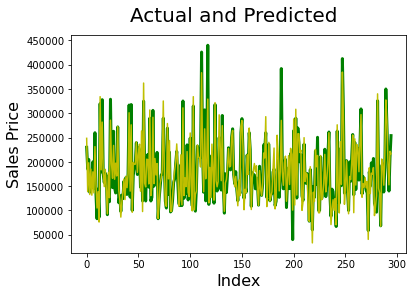

In [128]:
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="g", linewidth=3, linestyle="-")
plt.plot(c, y_test_pred, color="y",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=16)                              
plt.ylabel('Sales Price', fontsize=16)                         

#### 8.2 Ridge Regression with all features: Actual vs Predicted

Text(0, 0.5, 'Sales Price')

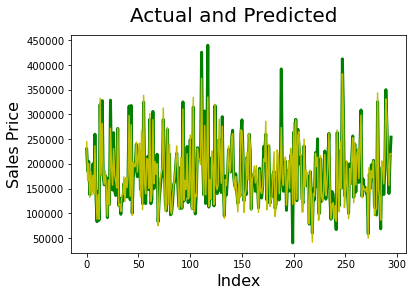

In [129]:
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="g", linewidth=3, linestyle="-")
plt.plot(c, y_test_pred_ridge, color="y",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index', fontsize=16) 
plt.ylabel('Sales Price', fontsize=16)

#### 8.3 Lasso Regression with all features: Actual vs Predicted

Text(0, 0.5, 'Sales Price')

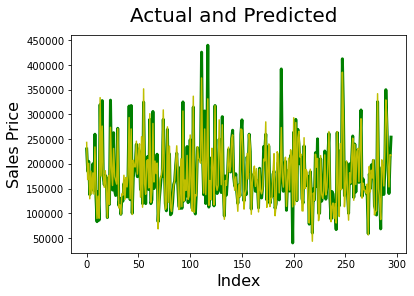

In [131]:
c = [i for i in range(0,y_test.shape[0],1)]
fig = plt.figure()
plt.plot(c, y_test, color="g", linewidth=3, linestyle="-")
plt.plot(c, y_test_pred_lasso, color="y",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)            
plt.xlabel('Index', fontsize=16)                             
plt.ylabel('Sales Price', fontsize=16)                     

## Conclusion :
- From 8.1, 8.2 and 8.3 we have we can say the model accuracy of all the models are similar so we can choose a simple model. Now the Linear Regression model is complex, hence rejecting. Even Ridge Rigression model is also complex hence rejecting it.
- Lasso Regression model is simpler, hence we would consider that.
- The optimal lambda value in case of Ridge and Lasso is as below:
    - Ridge - 4
    - Lasso - 50
- Most important 30 features that are affecting Sales pricing are:

In [133]:
for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
    print(f'{v:40}Score: {k}')

OverallQual_9                           Score: 44090.81
OverallQual_10                          Score: 28811.319
SaleCondition_Alloca                    Score: -28616.24
Neighborhood_StoneBr                    Score: 27458.272
Functional_Mod                          Score: -27408.595
Neighborhood_Crawfor                    Score: 23028.136
Neighborhood_MeadowV                    Score: -22777.991
KitchenQual_TA                          Score: -19807.934
KitchenQual_Gd                          Score: -19293.312
SaleCondition_Partial                   Score: 18086.014
Exterior1st_BrkFace                     Score: 17443.443
Functional_Typ                          Score: 15927.706
OverallQual_8                           Score: 15336.547
Condition1_RRAe                         Score: -14376.206
KitchenQual_Fa                          Score: -13807.831
MSSubClass_160                          Score: -13204.071
BsmtExposure_Gd                         Score: 12439.447
MSZoning_FV              